# Introduction

- **Dataset:** UCI Diabetes 130-US Hospitals dataset with 101,766 patient records over 10 years from 130 hospitals.  
- **Objective:** Predict early hospital readmission within 30 days for diabetic patients.  
- **Features:** Initially 50 clinical and demographic features included.  
- **Data Preprocessing:**  
  - Removed irrelevant columns.  
  - Handled missing values using mean, median, and mode imputation.  
  - Corrected skewness and capped outliers in numeric features.  
  - Encoded categorical variables (binary as 0/1, others with mapping).  
- **Feature Importance:**  
  - Extracted feature importance scores using LightGBM.  
- **Feature Selection & Modeling:**  
  - Performed feature selection using LSTM based on importance scores, selecting top 20 features.  
  - Trained a 1D CNN model on these selected features for final readmission prediction.  
- **Evaluation:**  
  - Evaluated CNN model performance using accuracy, confusion matrix, and classification report.  
  - Visualized confusion matrix to interpret results.

### In this analysis, machine learning techniques are applied to predict hospital readmissions in diabetic patients. The models used in this study include:

## **Random Forest**

## **XGBoost**

## **LightGBM**

## **CatBoost**

## **Stacking Classifier**

## **SVM**

## **Artificial Neural Networks (ANN)**

### These models were trained on a dataset, with special focus on handling imbalanced data using **SMOTE** (Synthetic Minority Over-sampling Technique). The performance of each model is compared to determine the most accurate approach for predicting hospital readmissions.

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
# pip install catboost
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("diabetic_data.csv")
df.replace("?", np.nan, inplace=True)

df.drop(['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'], axis=1, inplace=True)
df.fillna("Unknown", inplace=True)
 
 
df['age'] = df['age'].str.extract('(\d+)').astype(int)
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
df['total_visits'] = df['number_inpatient'] + df['number_outpatient'] + df['number_emergency']
df['change'] = df['change'].apply(lambda x: 1 if x == 'Ch' else 0)
df['diabetesMed'] = df['diabetesMed'].apply(lambda x: 1 if x == 'Yes' else 0)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


X = df.drop("readmitted", axis=1)
y = df["readmitted"]



sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **load dataset**
 (https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)

In [2]:
# Load the dataset
df= pd.read_csv('C:/Users/Asus/OneDrive/Desktop/kaggle dataset/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [33]:
# columns inside the dataset
print(df.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [35]:
print("Column description")
column_meanings = {
    'encounter_id': 'Unique identifier for a hospital visit',
    'patient_nbr': 'Unique identifier for a patient',
    'race': 'Patient race',
    'gender': 'Patient gender',
    'age': 'Patient age group',
    'weight': 'Patient weight',
    'admission_type_id': 'Type of hospital admission',
    'discharge_disposition_id': 'Discharge status of the patient',
    'admission_source_id': 'Source from where the patient was admitted',
    'time_in_hospital': 'Number of days patient stayed in hospital',
    'payer_code': 'Insurance payer code',
    'medical_specialty': 'Specialty of the admitting physician',
    'num_lab_procedures': 'Number of lab tests performed',
    'num_procedures': 'Number of procedures performed',
    'num_medications': 'Number of medications prescribed',
    'number_outpatient': 'Number of outpatient visits in the year before the encounter',
    'number_emergency': 'Number of emergency visits in the year before the encounter',
    'number_inpatient': 'Number of inpatient visits in the year before the encounter',
    'diag_1': 'Primary diagnosis',
    'diag_2': 'Secondary diagnosis',
    'diag_3': 'Additional diagnosis',
    'number_diagnoses': 'Number of diagnoses recorded',
    'max_glu_serum': 'Maximum glucose serum result',
    'A1Cresult': 'A1C test result',
    'metformin': 'Use of metformin',
    'repaglinide': 'Use of repaglinide',
    'nateglinide': 'Use of nateglinide',
    'chlorpropamide': 'Use of chlorpropamide',
    'glimepiride': 'Use of glimepiride',
    'acetohexamide': 'Use of acetohexamide',
    'glipizide': 'Use of glipizide',
    'glyburide': 'Use of glyburide',
    'tolbutamide': 'Use of tolbutamide',
    'pioglitazone': 'Use of pioglitazone',
    'rosiglitazone': 'Use of rosiglitazone',
    'acarbose': 'Use of acarbose',
    'miglitol': 'Use of miglitol',
    'troglitazone': 'Use of troglitazone',
    'tolazamide': 'Use of tolazamide',
    'examide': 'Use of examide',
    'citoglipton': 'Use of citoglipton',
    'insulin': 'Use of insulin',
    'glyburide-metformin': 'Combination drug: glyburide and metformin',
    'glipizide-metformin': 'Combination drug: glipizide and metformin',
    'glimepiride-pioglitazone': 'Combination drug: glimepiride and pioglitazone',
    'metformin-rosiglitazone': 'Combination drug: metformin and rosiglitazone',
    'metformin-pioglitazone': 'Combination drug: metformin and pioglitazone',
    'change': 'Whether there was a change in medication',
    'diabetesMed': 'Whether diabetes medication was prescribed',
    'readmitted': 'Whether the patient was readmitted (within 30 days or not)'
}

# Meaning of each columns
for col in df.columns:
    meaning = column_meanings.get(col, 'No description available')
    print(f"{col}: {meaning}")


Column description
encounter_id: Unique identifier for a hospital visit
patient_nbr: Unique identifier for a patient
race: Patient race
gender: Patient gender
age: Patient age group
weight: Patient weight
admission_type_id: Type of hospital admission
discharge_disposition_id: Discharge status of the patient
admission_source_id: Source from where the patient was admitted
time_in_hospital: Number of days patient stayed in hospital
payer_code: Insurance payer code
medical_specialty: Specialty of the admitting physician
num_lab_procedures: Number of lab tests performed
num_procedures: Number of procedures performed
num_medications: Number of medications prescribed
number_outpatient: Number of outpatient visits in the year before the encounter
number_emergency: Number of emergency visits in the year before the encounter
number_inpatient: Number of inpatient visits in the year before the encounter
diag_1: Primary diagnosis
diag_2: Secondary diagnosis
diag_3: Additional diagnosis
number_diagn

In [36]:
# dataset info()
print(df.info())
print(f'Shape of dataset: -- {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [37]:
# Identify null values in each columns
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [38]:
for col in df.columns:
  null_counts=df[col].isnull().sum()
  if(null_counts>0):
    print(f'{col} :{null_counts} null values')


max_glu_serum :96420 null values
A1Cresult :84748 null values


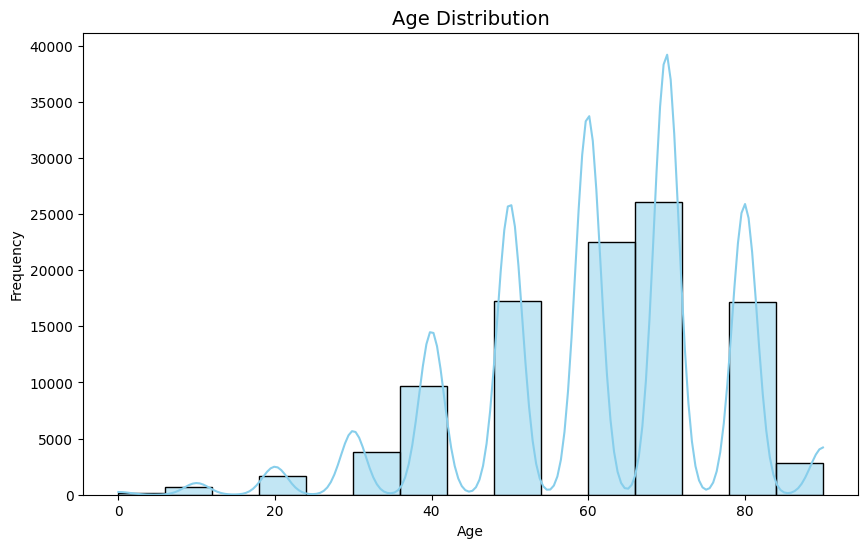

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



## Outliers handled by Capping

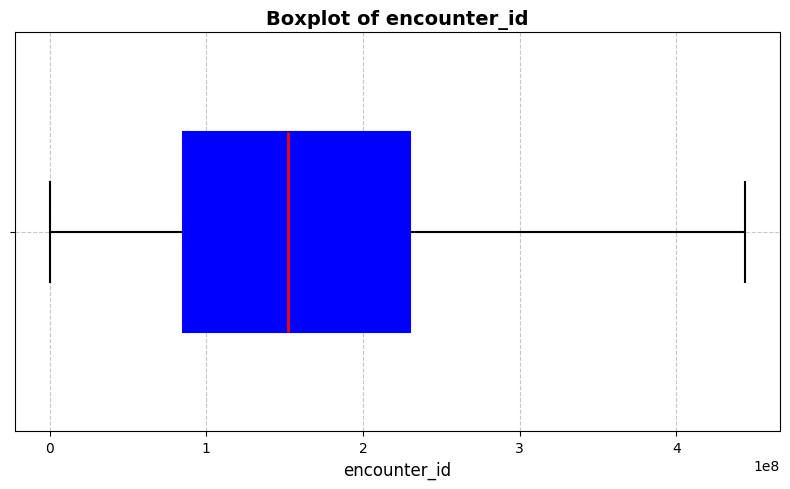

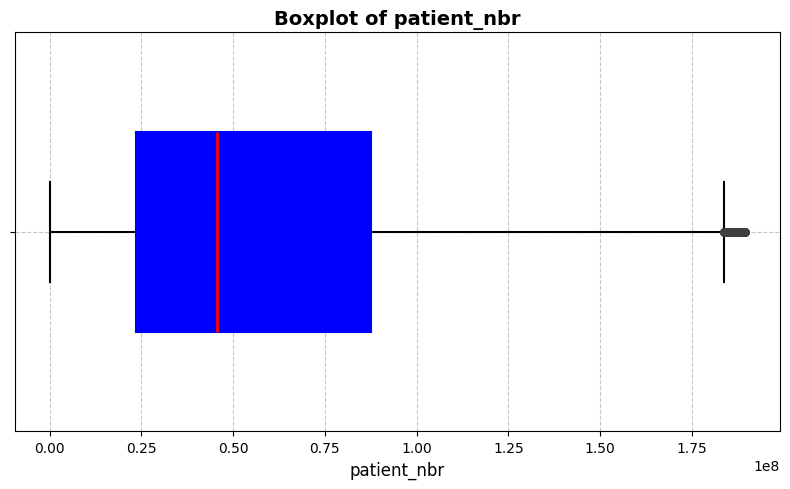

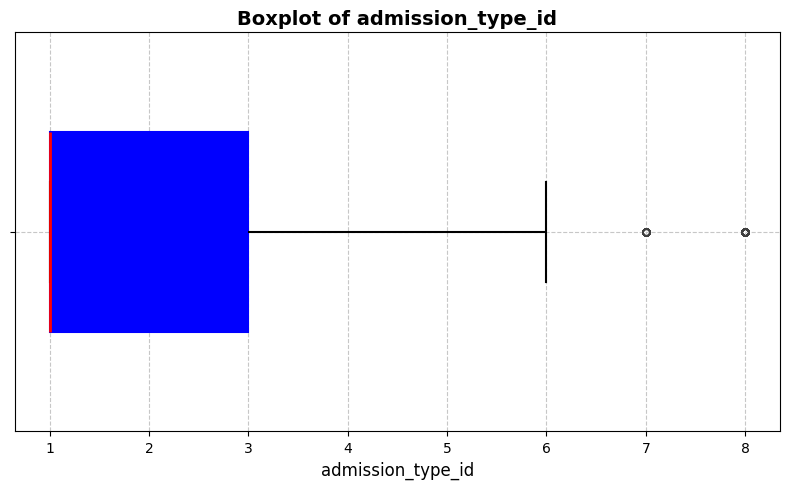

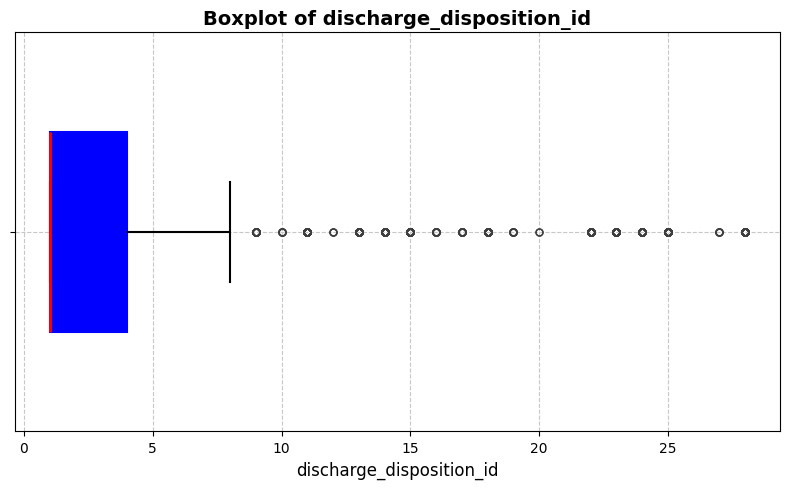

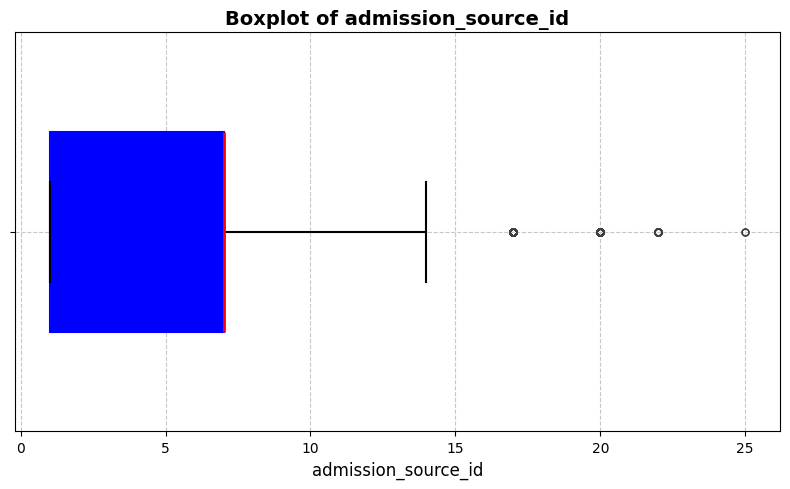

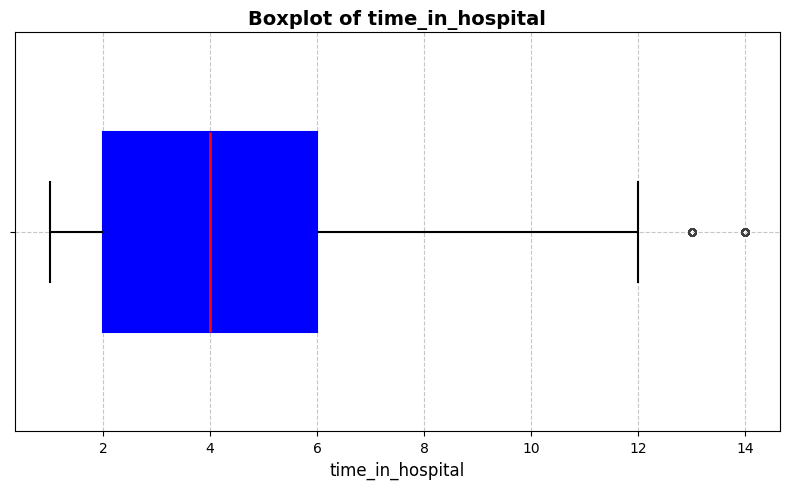

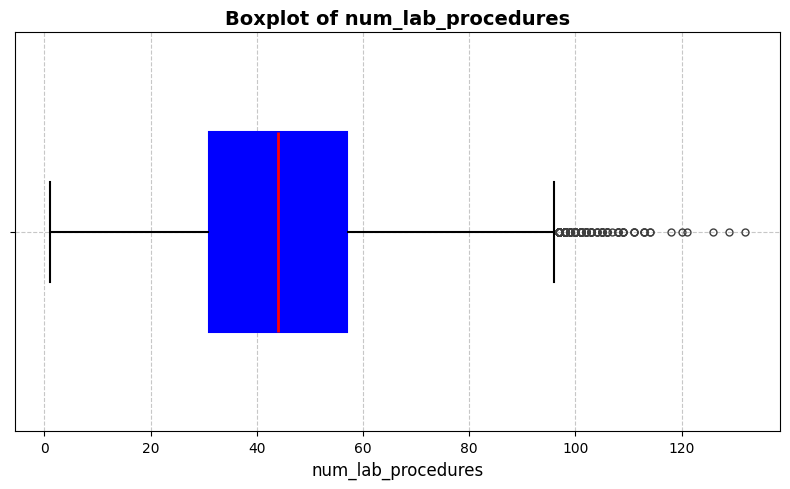

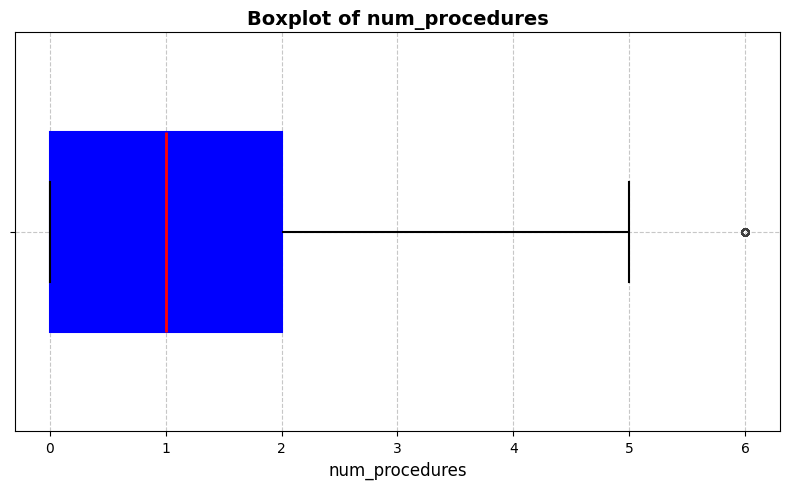

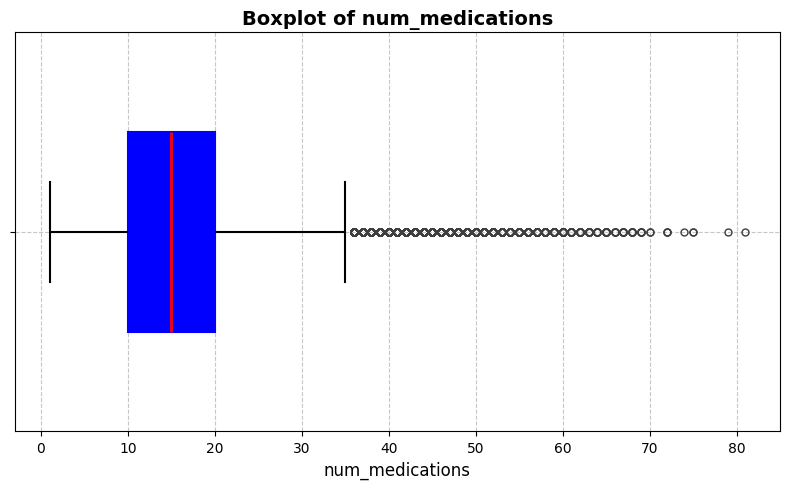

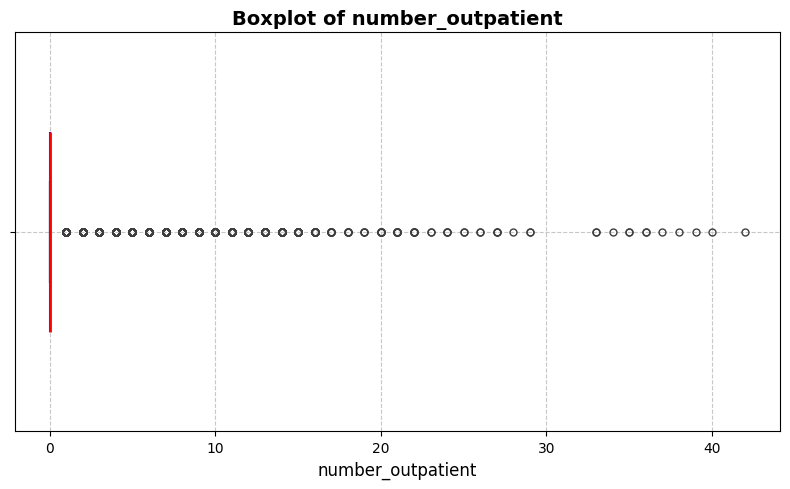

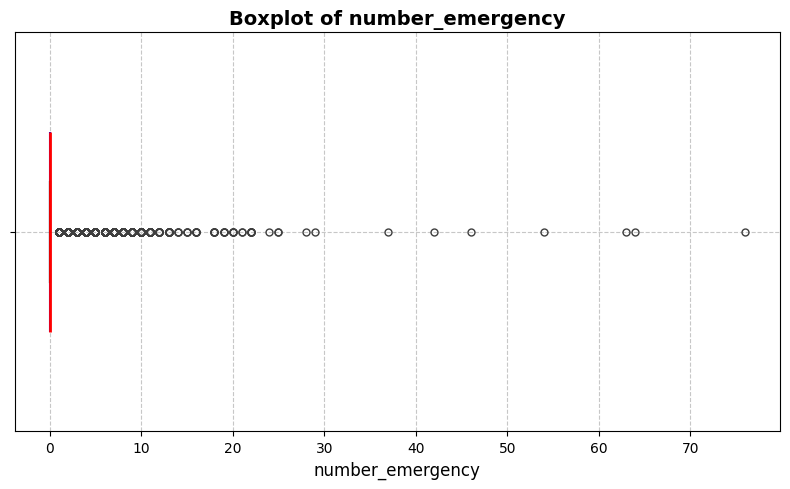

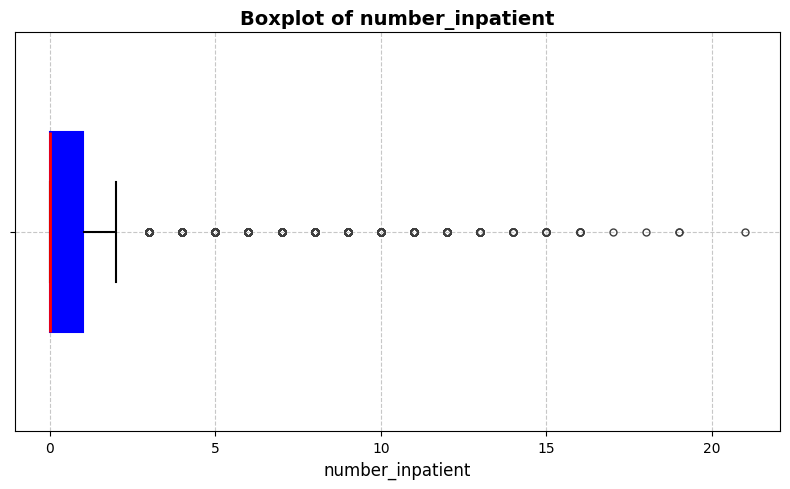

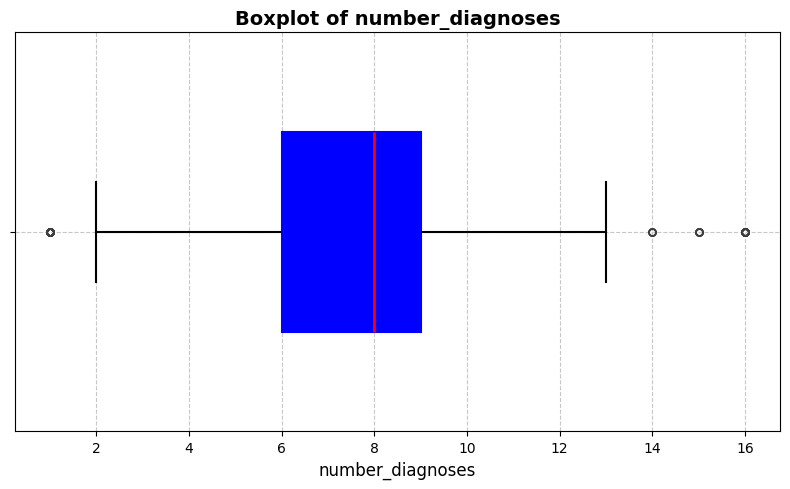

In [39]:
# It means all the outliers are easily handled by capping
numeric_col=df.select_dtypes(include=['int64','float64']).columns
for col in numeric_col:
  plt.figure(figsize=(8,5))
  sns.boxplot(data=df,x=col,
              width=0.5,
            fliersize=5,
            linewidth=1.5,        #
             boxprops=dict(facecolor='lightblue', color='blue'),
           whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        medianprops=dict(color='red',
        linewidth=2)
              )
  plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
  plt.xlabel(col, fontsize=12)
  plt.grid(True, linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.show()





In [40]:
# Handle outliers by using Capping technique
def cap_outlier_iqr(df,numeric_col):
  for col in numeric_col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    # using capping so there is no data loss
    # lower bound capping
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    # upper bound capping
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

  return df

df = cap_outlier_iqr(df, numeric_col)
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6.0,8.5,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


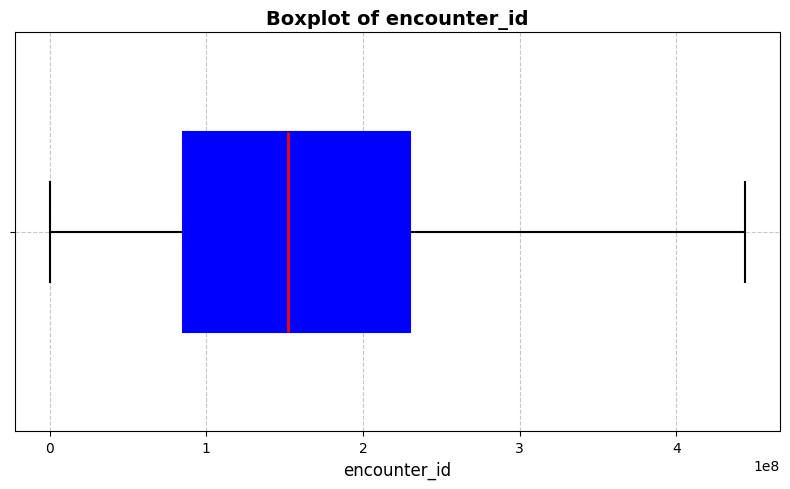

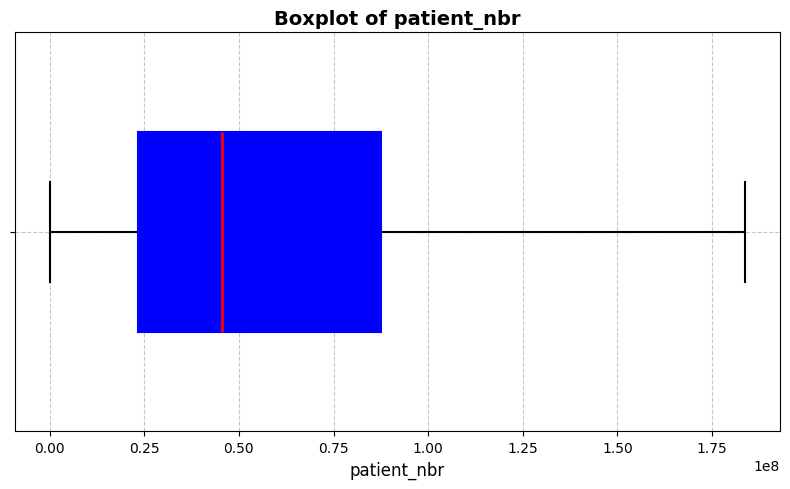

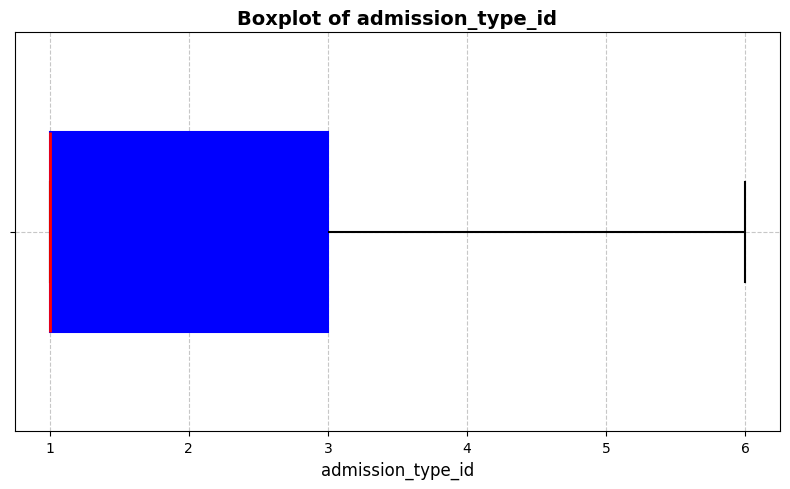

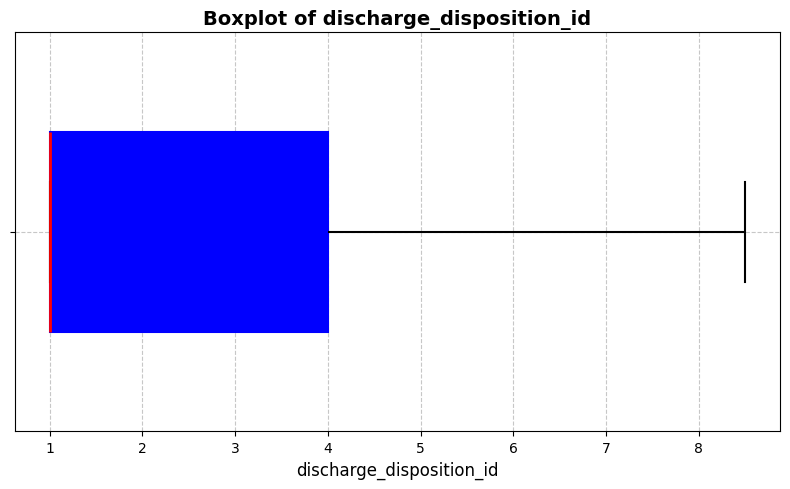

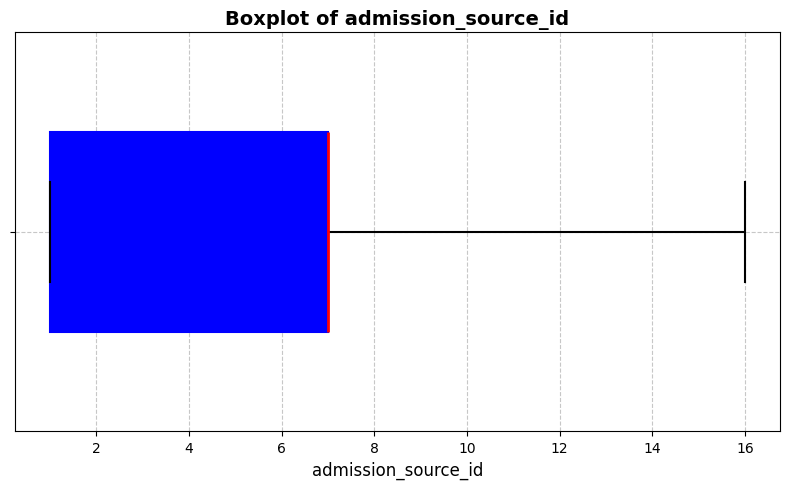

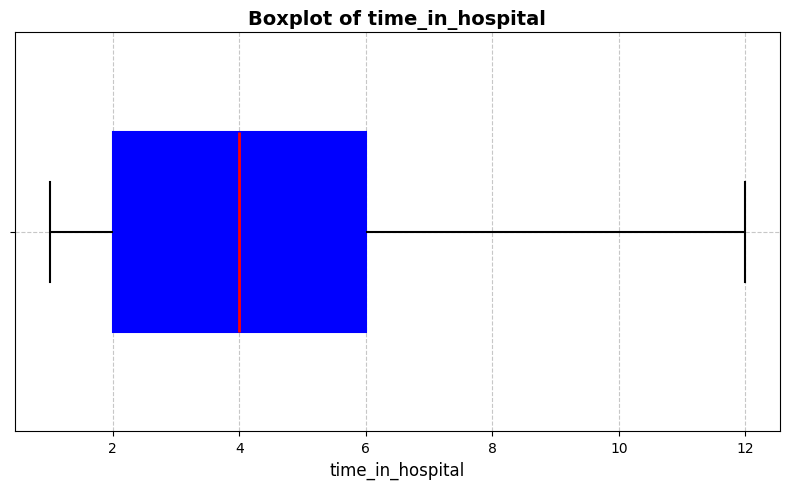

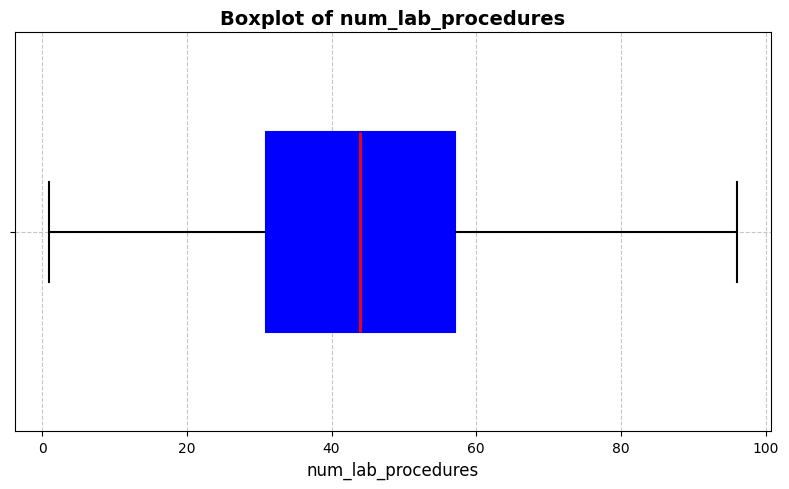

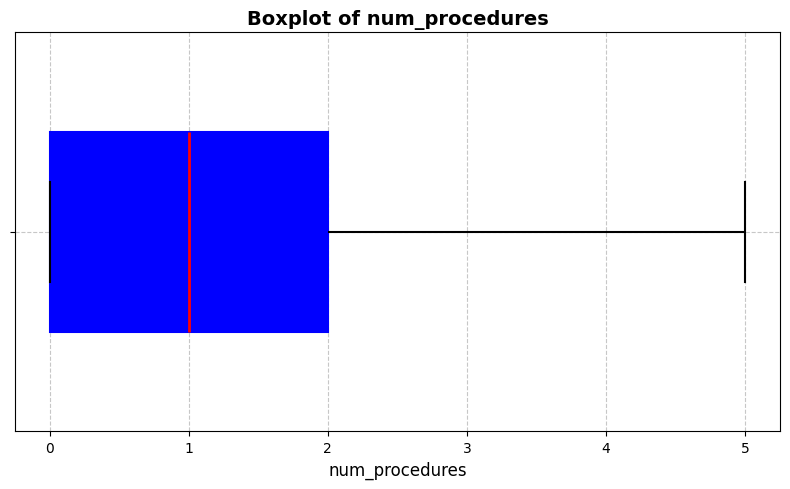

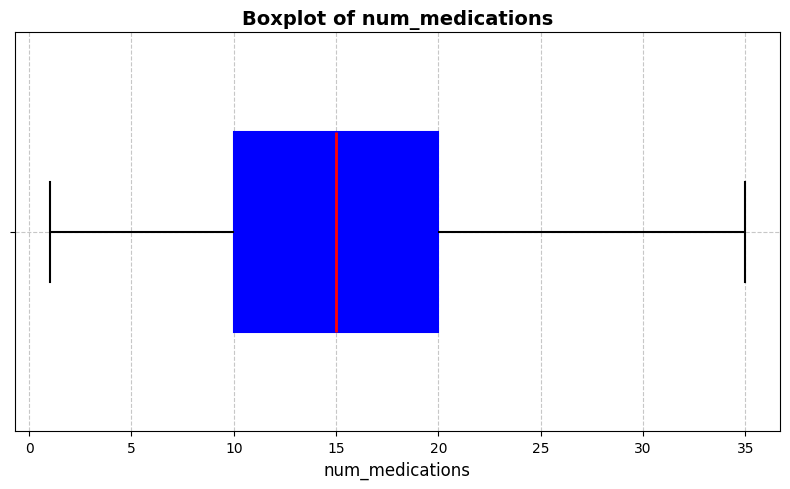

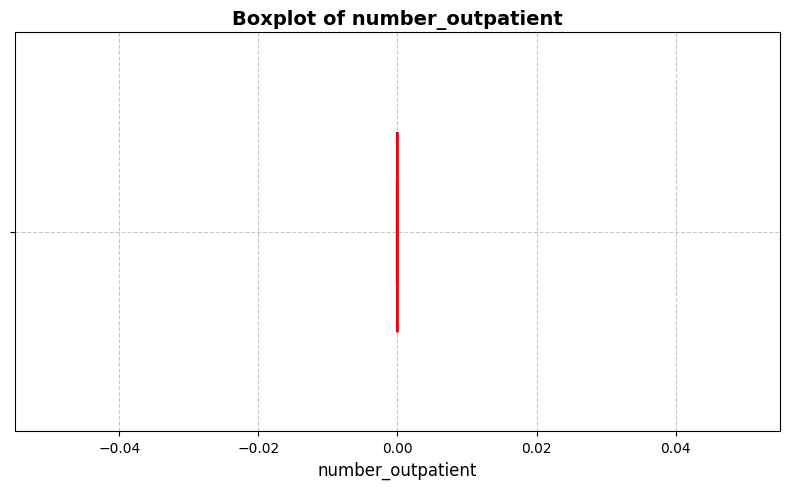

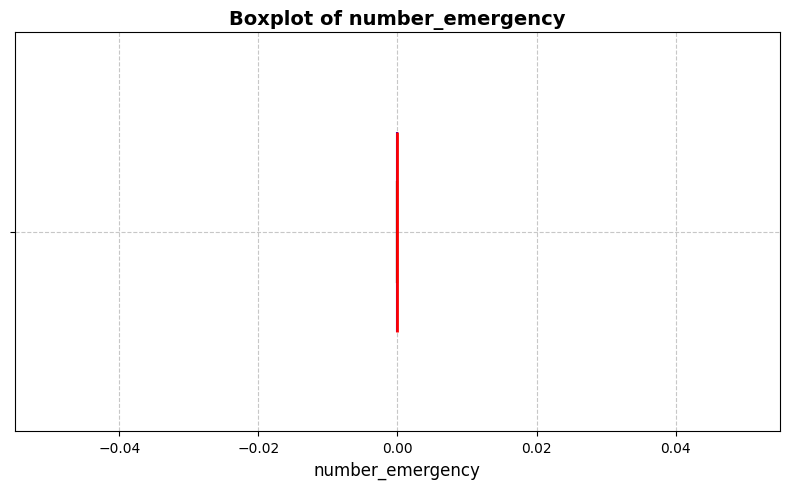

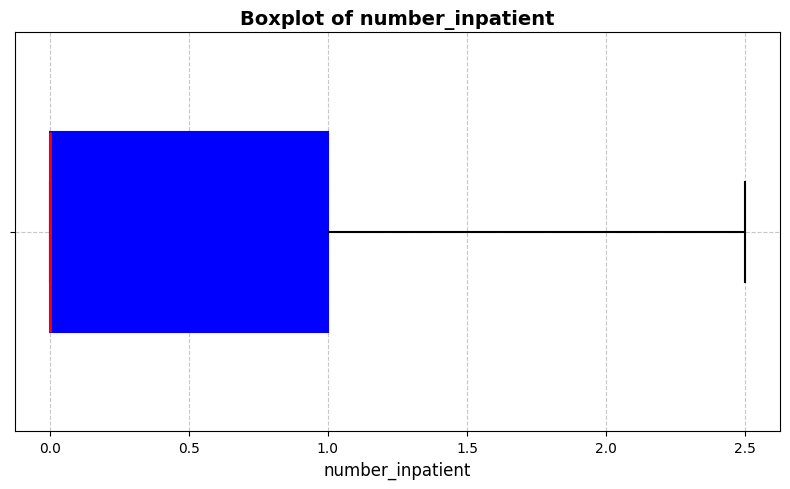

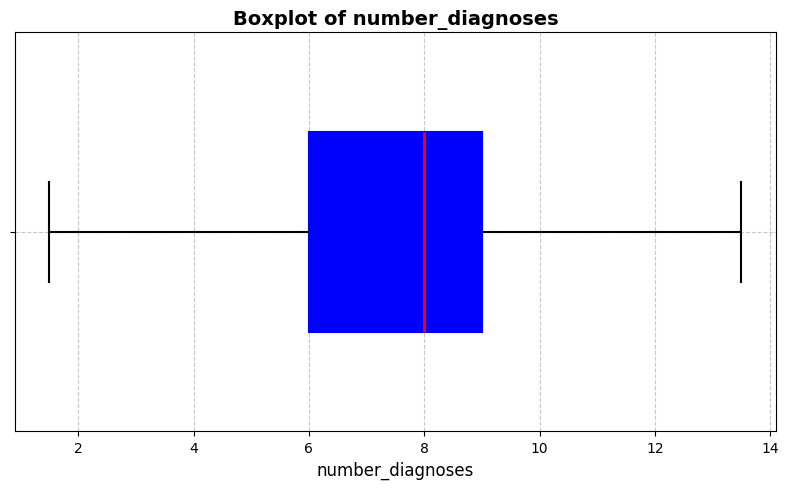

In [41]:
for col in numeric_col:
  plt.figure(figsize=(8,5))
  sns.boxplot(data=df,x=col,
              width=0.5,
            fliersize=5,
            linewidth=1.5,        #
             boxprops=dict(facecolor='lightblue', color='blue'),
           whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        medianprops=dict(color='red',
        linewidth=2)
              )
  plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
  plt.xlabel(col, fontsize=12)
  plt.grid(True, linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.show()


## Fill only numerical Missing values based on Skewness

In [42]:
# Handling Missing numerical data with  skewness ,if exists
for col in numeric_col:
    skewness = round(df[col].skew(), 1)
    print(f'{col} : {skewness}')
    if -0.5 < skewness < 0.5:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].median())





encounter_id : 0.7
patient_nbr : 0.5
admission_type_id : 1.5
discharge_disposition_id : 1.2
admission_source_id : 0.8
time_in_hospital : 1.0
num_lab_procedures : -0.2
num_procedures : 1.1
num_medications : 0.7
number_outpatient : 0.0
number_emergency : 0.0
number_inpatient : 1.3
number_diagnoses : -0.9


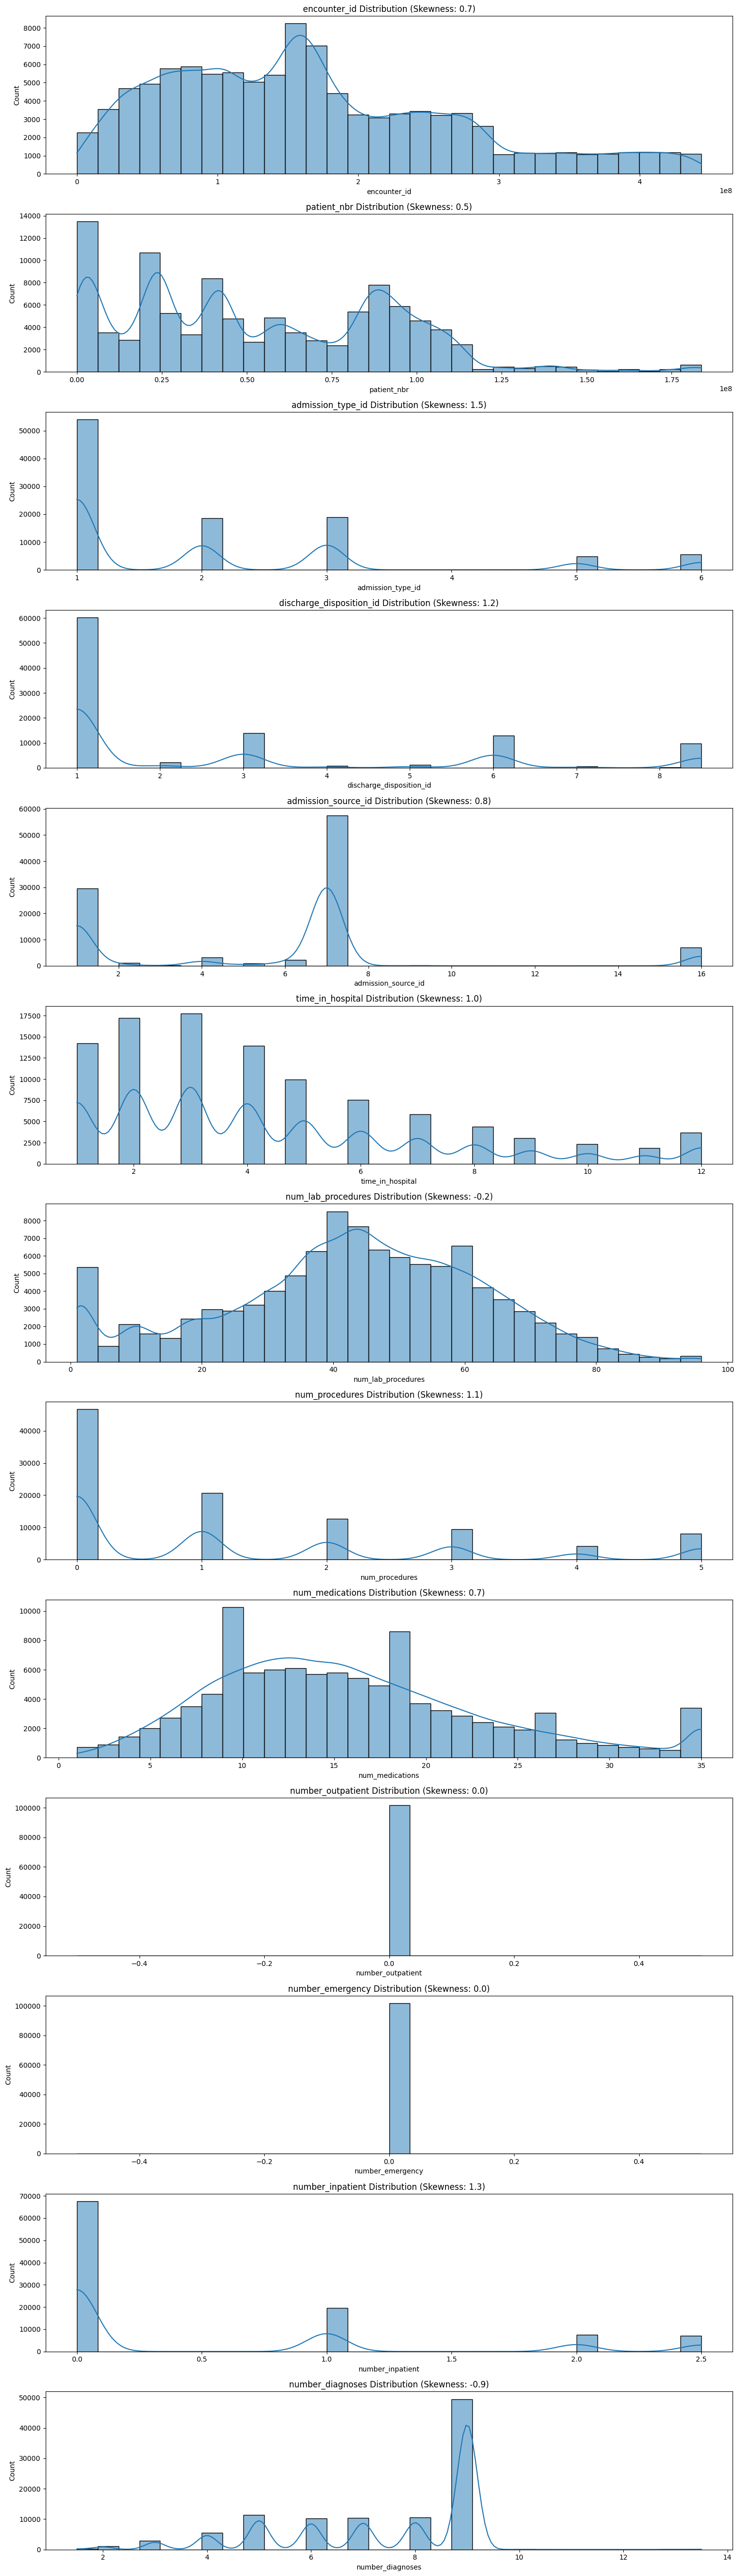

In [43]:
# plot numeric data with skewness
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, len(numeric_col)*4))

for i, col in enumerate(numeric_col, 1):
    skewness = round(df[col].skew(), 1)
    plt.subplot(len(numeric_col), 1, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution (Skewness: {skewness})')

plt.tight_layout()
plt.show()


## Missing values handled of Categorical Data by Mode

In [44]:
# Hanlding categorical data with Mode
df['max_glu_serum']=df['max_glu_serum'].fillna(df['max_glu_serum'].mode()[0])
df['A1Cresult']=df['A1Cresult'].fillna(df['A1Cresult'].mode()[0])
print(df.isnull().sum())
print(df.info())


encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

## Dropped Un required Column that not effect the machine learning model

In [45]:
# 1.drop weight columns
print(df.weight.value_counts())
df.drop(columns=['weight'], inplace=True)

#Reason to Drop weight:
#Over 96% missing (?) values → too sparse to learn any reliable pattern.

#Remaining ~3% of values are not only very few but also highly skewed.

#Imputation (e.g., with mode or median) would introduce significant noise or bias.

#Keeping it will not help the model and may confuse training with an irrelevant feature.


weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64


In [46]:
#2.drop encounter_id
print(df.encounter_id.value_counts())
df.drop(columns=['encounter_id'], inplace=True)
# Feature Removed: encounter_id
# Reason: This column serves as a unique identifier for each hospital visit and holds no clinical or demographic information about the patient. It is purely nominal, non-informative, and does not contribute to learning patterns or outcomes in the predictive modeling process.
# Including such arbitrary identifiers may cause models to overfit on meaningless patterns or introduce bias without improving generalization.
# Hence, to ensure that the model only learns from relevant clinical and behavioral features, encounter_id was excluded from the final feature set.

encounter_id
443867222.0    1
2278392.0      1
149190.0       1
64410.0        1
500364.0       1
              ..
15738.0        1
28236.0        1
36900.0        1
40926.0        1
42570.0        1
Name: count, Length: 101766, dtype: int64


In [47]:
# 3.drop patient_nbr
print(df.patient_nbr.value_counts())
df.drop(columns=['patient_nbr'], inplace=True)
print(f"Reason to drop : Patient identifier. It doesn't contribute to the prediction task and acts as a redundant, non-informative ID. Retaining it can leak identity patterns without offering real predictive power")

patient_nbr
1.837450e+08    247
8.878589e+07     40
4.314091e+07     28
2.319902e+07     23
1.660293e+06     23
               ... 
3.662067e+07      1
5.514637e+07      1
4.952054e+07      1
9.120054e+07      1
8.425981e+07      1
Name: count, Length: 71303, dtype: int64
Reason to drop : Patient identifier. It doesn't contribute to the prediction task and acts as a redundant, non-informative ID. Retaining it can leak identity patterns without offering real predictive power


## feature imporantance by using LightGBM

In [48]:
# payer code
print(df.payer_code.value_counts())

# # payer code importance by using lightgbm
# df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

import lightgbm as lgb
X = pd.get_dummies(df['payer_code'], dummy_na=True)
y = df['readmitted']

model = lgb.LGBMClassifier()
model.fit(X, y)
importances = model.feature_importances_

importance_dict = dict(zip(X.columns, importances))
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Payer Code', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df)
print()
print("1.Most payer_code categories  importance 260-296. its effect our Model \n 2.FR' aur 'NaN' categories  importance 0 replace with unknown \n 3.'?'  importance around  285 replace with unknown.")

payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 101766, number of used features: 17
[LightGBM] [Info] Start training from score -2.192842
[LightGBM] [Info] Start training from score -1.051877
[LightGBM] [Info] Start training from score -0.617819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [49]:
# Replace '?' with 'Unknown'
df['payer_code'] = df['payer_code'].replace('?', 'Unknown')

# Replace NaN with 'Unknown'
df['payer_code'] = df['payer_code'].fillna('Unknown')

# Replace rare category 'FR' with 'Unknown'
df['payer_code'] = df['payer_code'].replace('FR', 'Unknown')

# One-hot encode clean payer_code
X = pd.get_dummies(df['payer_code'])

# Target
y = df['readmitted']

# Train LightGBM
model = lgb.LGBMClassifier()
model.fit(X, y)

# Feature importance again check karo
importances = model.feature_importances_
importance_dict = dict(zip(X.columns, importances))
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Payer Code', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 101766, number of used features: 17
[LightGBM] [Info] Start training from score -2.192842
[LightGBM] [Info] Start training from score -1.051877
[LightGBM] [Info] Start training from score -0.617819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [50]:
# medical_speciality columns
print(df.medical_specialty.value_counts())


medical_specialty
?                         49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
                          ...  
Proctology                    1
Speech                        1
SportsMedicine                1
Perinatology                  1
Neurophysiology               1
Name: count, Length: 73, dtype: int64


In [51]:
# 4.medical_specialty: total 73 different values so handle it

df['medical_specialty'] = df['medical_specialty'].replace('?','Unknown')
df['medical_specialty'] = df['medical_specialty'].fillna('Unknown')
print(df.medical_specialty.value_counts())
# specialty_counts = df['medical_specialty'].value_counts()
# print(specialty_counts)

medical_specialty
Unknown                   49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
                          ...  
Proctology                    1
Speech                        1
SportsMedicine                1
Perinatology                  1
Neurophysiology               1
Name: count, Length: 73, dtype: int64


In [52]:
specialty_counts = df['medical_specialty'].value_counts()
rare_specialties = specialty_counts[specialty_counts < 100].index  # threshold tune kar sakta hai
df['medical_specialty'] = df['medical_specialty'].replace(rare_specialties, 'Other')
print(df.medical_specialty.value_counts())



medical_specialty
Unknown                              49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Other                                  925
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                 

In [53]:
# Importance categorical data in medical column
import pandas as pd
import lightgbm as lgb

# Step 1: One-hot encode cleaned 'medical_specialty'
X = pd.get_dummies(df['medical_specialty'], prefix='specialty')

# Step 2: Target variable
y = df['readmitted']

# Step 3: LightGBM model
model = lgb.LGBMClassifier()
model.fit(X, y)

# Step 4: Feature importances
importances = model.feature_importances_
importance_dict = dict(zip(X.columns, importances))

# Step 5: Tabular format
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Medical Specialty', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 101766, number of used features: 30
[LightGBM] [Info] Start training from score -2.192842
[LightGBM] [Info] Start training from score -1.051877
[LightGBM] [Info] Start training from score -0.617819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [54]:
print('We connot drop it, it is important for our dataset')

We connot drop it, it is important for our dataset


In [55]:
# examide column
print(df.examide.value_counts())
print("There is no vairannce int the data so we drop it ")
df.drop(columns=['examide'], inplace=True)

examide
No    101766
Name: count, dtype: int64
There is no vairannce int the data so we drop it 


In [56]:
# citoglipton
print(df['citoglipton'].value_counts())
print("There is no vairannce int the data so we drop it ")
df.drop(columns=['citoglipton'], inplace=True)

citoglipton
No    101766
Name: count, dtype: int64
There is no vairannce int the data so we drop it 


In [57]:
df.metformin.value_counts()   #Not dropped

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

In [58]:
df.glimepiride.value_counts()    #Not dropped

glimepiride
No        96575
Steady     4670
Up          327
Down        194
Name: count, dtype: int64

In [59]:
df.pioglitazone.value_counts()   #Not dropped

pioglitazone
No        94438
Steady     6976
Up          234
Down        118
Name: count, dtype: int64

In [60]:
df.metformin.value_counts()    #Not dropped

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

In [61]:
df.rosiglitazone.value_counts()   #Not dropped

rosiglitazone
No        95401
Steady     6100
Up          178
Down         87
Name: count, dtype: int64

In [62]:
df.info() #5 columns removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101766 non-null  object 
 1   gender                    101766 non-null  object 
 2   age                       101766 non-null  object 
 3   admission_type_id         101766 non-null  float64
 4   discharge_disposition_id  101766 non-null  float64
 5   admission_source_id       101766 non-null  float64
 6   time_in_hospital          101766 non-null  float64
 7   payer_code                101766 non-null  object 
 8   medical_specialty         101766 non-null  object 
 9   num_lab_procedures        101766 non-null  float64
 10  num_procedures            101766 non-null  float64
 11  num_medications           101766 non-null  float64
 12  number_outpatient         101766 non-null  float64
 13  number_emergency          101766 non-null  f

## Low variance technique features Dropped

In [63]:
# 1.Low variance  helps to identify the unrequried columns
numeric_col=df.select_dtypes(include=['int64','float64']).columns
print(numeric_col)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  # threshold tweak kar sakte ho
selector.fit(df[numeric_col])

low_variance_cols = df[numeric_col].columns[~selector.get_support()]
print("Low variance columns:", list(low_variance_cols))


# Here we not dropped number_outpatients and number_emergency columns it effect
# our machine learning Model prediction

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')
Low variance columns: ['number_outpatient', 'number_emergency']


## Correlation Analysis features dropped

In [64]:
# 2.correlation analysis  helps to identify the unrequired columns
corr_matrix = df[numeric_col].corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.85)]
print("Highly correlated columns to drop:", to_drop)
# There is no any columns having constant high ratings


Highly correlated columns to drop: []


## categorical data having only 2 different value handled by binary mapping
## categorical data having  more than  2 different value handled by one hot encoding

In [65]:
# 1.Use label Mapping  having 2 unique value
# 2.use one hot encoding having more than 2 unique value
categoric_col= df.select_dtypes(include=['object']).columns
print(categoric_col)
binary_col=[]
one_hot_col=[]
for col in categoric_col:
  unique_value=df[col].nunique()
  if(unique_value==2):
    binary_col.append(col)
  else:
    one_hot_col.append(col)

Index(['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [66]:
# All  values in binary columns
for i, col in enumerate(binary_col, 1):
    print(i, col)
    print(df[col].value_counts())
    print()





1 acetohexamide
acetohexamide
No        101765
Steady         1
Name: count, dtype: int64

2 tolbutamide
tolbutamide
No        101743
Steady        23
Name: count, dtype: int64

3 troglitazone
troglitazone
No        101763
Steady         3
Name: count, dtype: int64

4 glipizide-metformin
glipizide-metformin
No        101753
Steady        13
Name: count, dtype: int64

5 glimepiride-pioglitazone
glimepiride-pioglitazone
No        101765
Steady         1
Name: count, dtype: int64

6 metformin-rosiglitazone
metformin-rosiglitazone
No        101764
Steady         2
Name: count, dtype: int64

7 metformin-pioglitazone
metformin-pioglitazone
No        101765
Steady         1
Name: count, dtype: int64

8 change
change
No    54755
Ch    47011
Name: count, dtype: int64

9 diabetesMed
diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64



In [67]:
binary_mappings = {
    'Yes': 1,
    'No': 0,
    'Ch': 1,
    'No Change': 0,
    'Steady':1
}

for col in binary_col:
    df[col] = df[col].map(binary_mappings)




In [68]:
for i, col in enumerate(binary_col, 1):
    # df[col] = df[col].map({'Yes': 1, 'No': 0})  # agar mapping karni ho to uncomment karo
    print(i, col)
    print(df[col].value_counts())
    print()


1 acetohexamide
acetohexamide
0    101765
1         1
Name: count, dtype: int64

2 tolbutamide
tolbutamide
0    101743
1        23
Name: count, dtype: int64

3 troglitazone
troglitazone
0    101763
1         3
Name: count, dtype: int64

4 glipizide-metformin
glipizide-metformin
0    101753
1        13
Name: count, dtype: int64

5 glimepiride-pioglitazone
glimepiride-pioglitazone
0    101765
1         1
Name: count, dtype: int64

6 metformin-rosiglitazone
metformin-rosiglitazone
0    101764
1         2
Name: count, dtype: int64

7 metformin-pioglitazone
metformin-pioglitazone
0    101765
1         1
Name: count, dtype: int64

8 change
change
0    54755
1    47011
Name: count, dtype: int64

9 diabetesMed
diabetesMed
1    78363
0    23403
Name: count, dtype: int64



In [69]:
# all one hot encoding columns
for i, col in enumerate(one_hot_col):
    print(i, col, type(col))


0 race <class 'str'>
1 gender <class 'str'>
2 age <class 'str'>
3 payer_code <class 'str'>
4 medical_specialty <class 'str'>
5 diag_1 <class 'str'>
6 diag_2 <class 'str'>
7 diag_3 <class 'str'>
8 max_glu_serum <class 'str'>
9 A1Cresult <class 'str'>
10 metformin <class 'str'>
11 repaglinide <class 'str'>
12 nateglinide <class 'str'>
13 chlorpropamide <class 'str'>
14 glimepiride <class 'str'>
15 glipizide <class 'str'>
16 glyburide <class 'str'>
17 pioglitazone <class 'str'>
18 rosiglitazone <class 'str'>
19 acarbose <class 'str'>
20 miglitol <class 'str'>
21 tolazamide <class 'str'>
22 insulin <class 'str'>
23 glyburide-metformin <class 'str'>
24 readmitted <class 'str'>


In [70]:
# use one hot encoding
if 'readmitted' in one_hot_col:
    one_hot_col.remove('readmitted') # because it is the target variable ,so not transform

df_one_hot = pd.get_dummies(df[one_hot_col], drop_first=False)
df_encode = df.drop(columns=one_hot_col)
df_encode= pd.concat([df_encode, df_one_hot], axis=1)
print(df_encode.columns)



Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'tolazamide_Steady', 'tolazamide_Up', 'insulin_Down', 'insulin_No',
       'insulin_Steady', 'insulin_Up', 'glyburide-metformin_Down',
       'glyburide-metformin_No', 'glyburide-metformin_Steady',
       'glyburide-metformin_Up'],
      dtype='object', length=2404)


In [71]:
# This is our clean dataset on which we perfrom feature scaling
print(f'{df_encode.shape}')
df_encode.head()

(101766, 2404)


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up
0,6.0,8.5,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,True,False,False
1,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,True,False,False
2,1.0,1.0,7.0,2.0,11.0,5.0,13.0,0.0,0.0,1.0,...,False,False,False,True,False,False,False,True,False,False
3,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,True,False,False
4,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,False,False


In [72]:
df_encode['readmitted'] = df_encode['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
print(df_encode.readmitted.value_counts())

readmitted
0    90409
1    11357
Name: count, dtype: int64


## RandomForest+BorutaPY

In [73]:
# feature Selection RamdomForest+Borutu+Shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [74]:
X = df_encode.drop(columns=['readmitted'])
y = df_encode['readmitted']


In [75]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

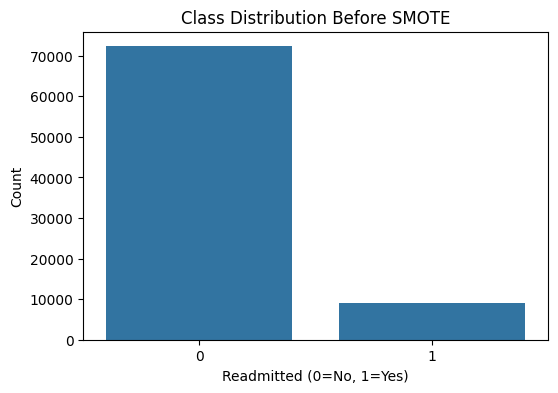

In [76]:
# 4. Visualize class distribution before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Readmitted (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

In [77]:
# 5. Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
# 6. Boruta Feature Selection (on a sample for memory efficiency)
X_small = X_train_scaled[:5000]
y_small = y_train[:5000]

In [79]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=7, random_state=42)
boruta = BorutaPy(estimator=rf, n_estimators='auto', max_iter=20, random_state=42)
boruta.fit(X_small, y_small)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=7,
                                          n_estimators=53, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x24B2299FE40),
         max_iter=20, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x24B2299FE40)

In [80]:
# 7. Get selected features
selected_mask = boruta.support_
X_train_selected = X_train_scaled[:, selected_mask]
X_test_selected = X_test_scaled[:, selected_mask]

In [81]:
# apply smote
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_selected, y_train)

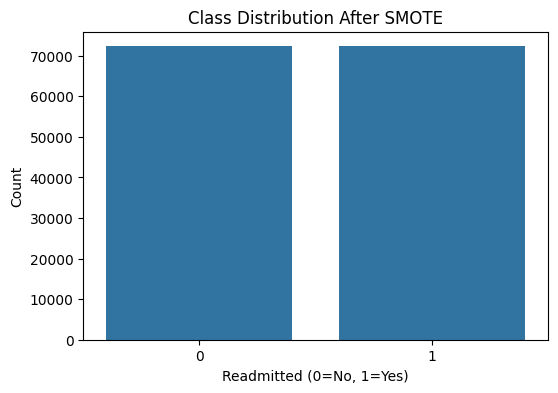

In [82]:
# 10. Visualize class distribution after SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_bal)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Readmitted (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

In [83]:
selected_feature_names = np.array(df_encode.drop(columns=['readmitted']).columns)[selected_mask]
print(" Selected Features:\n", selected_feature_names)

 Selected Features:
 ['num_lab_procedures' 'number_inpatient']


## AutoEncoders Features Selection

In [84]:
# 2. AutoEncoders Featrue Selection 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Dense

In [86]:
# Top 20 compressed Features
input_dim = X_train.shape[1]
encoding_dim = 20 

# Encoder
input_layer = Input(shape=(input_dim,))
x = Dense(64)(input_layer)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Dense(40)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

encoded = Dense(encoding_dim)(x)
encoded = LeakyReLU()(encoded)

x = Dense(40)(encoded)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Dense(64)(x)
x = LeakyReLU()(x)

decoded = Dense(input_dim, activation='linear')(x)


In [87]:
# Compile model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
#Train model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, verbose=1)



Epoch 1/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.2054
Epoch 2/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0195
Epoch 3/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 0.0153
Epoch 4/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - loss: 0.0135
Epoch 5/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - loss: 0.0120
Epoch 6/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - loss: 0.0118
Epoch 7/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - loss: 0.0111
Epoch 8/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0105
Epoch 9/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 0.0101
Epoch 10/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0099
Epoch 11/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0094
Epoch 12/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 0.0095
Epoch 13/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 0.0091
Epoch 14/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - loss: 0.0089
Epoch 15/5

In [88]:
# Create encoder model
encoder = Model(input_layer, encoded)
X_auto = encoder.predict(X_train)
# Create DataFrame for compressed features
auto_df = pd.DataFrame(X_auto, columns=[f'Auto_{i+1}' for i in range(encoding_dim)])


2545/2545 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


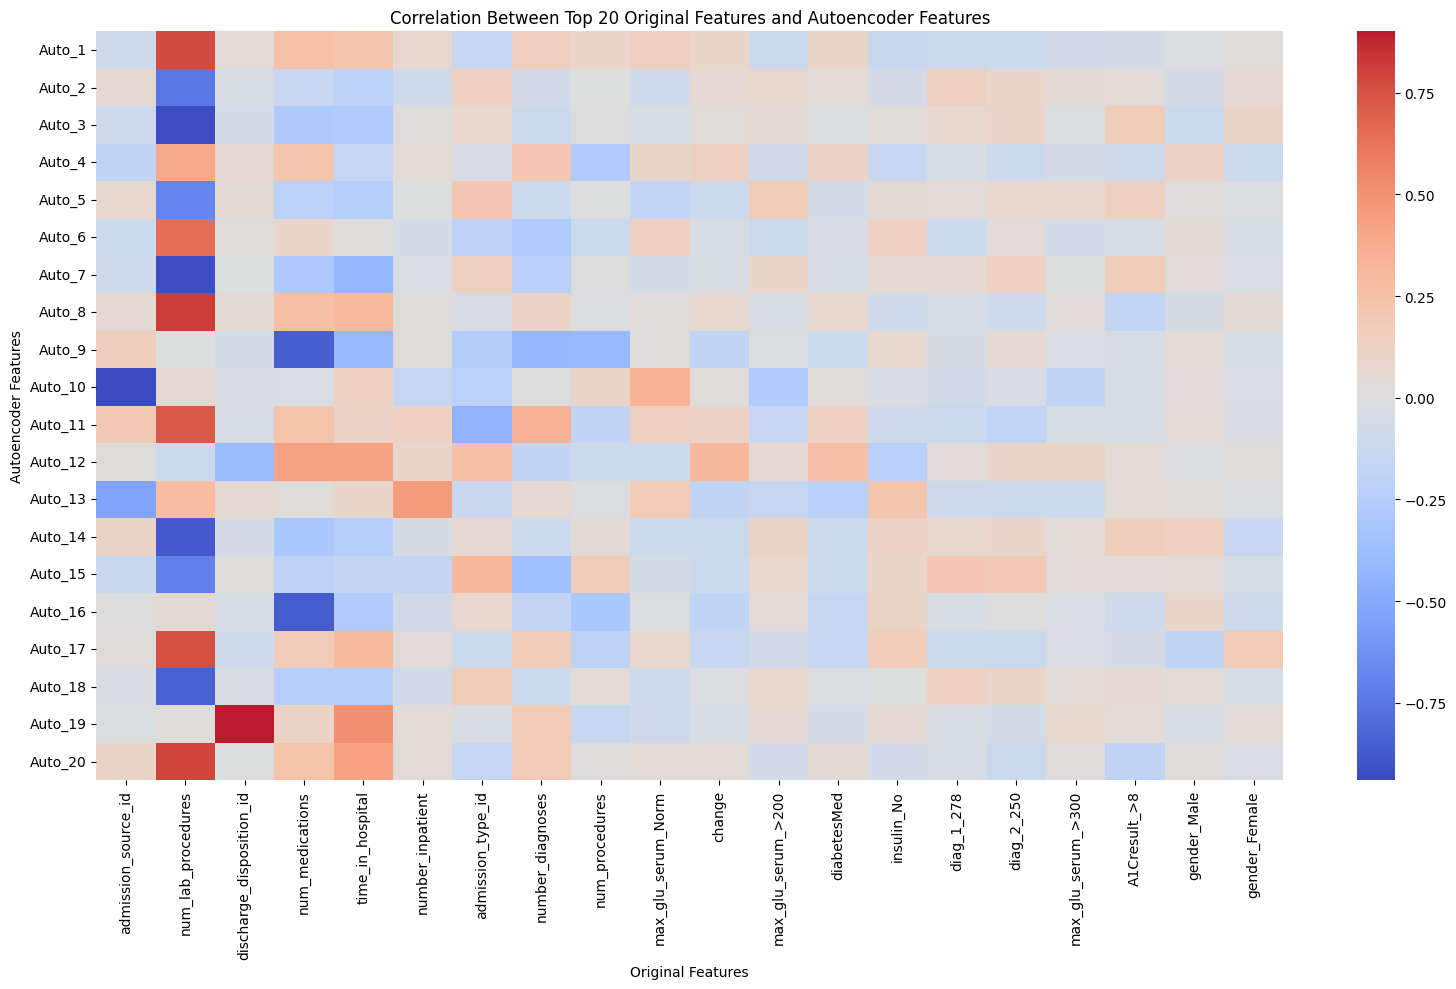

In [89]:
# Top 20 features using Autoencoders
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure sample size is manageable to avoid memory errors
sample_size = 1000
sample_idx = np.random.choice(len(auto_df), size=sample_size, replace=False)

# Sample the autoencoder and original features
sample_auto_df = auto_df.iloc[sample_idx].reset_index(drop=True)
orig_columns = df_encode.drop(columns=['readmitted']).columns
sample_orig_df = pd.DataFrame(X_train, columns=orig_columns).iloc[sample_idx].reset_index(drop=True)

# Combine sampled DataFrames
combined_df = pd.concat([sample_auto_df, sample_orig_df], axis=1)

# Correlation matrix
corr_matrix = combined_df.corr().loc[sample_auto_df.columns, sample_orig_df.columns]

# Select top 20 most correlated original features with any autoencoder feature
top_features = corr_matrix.abs().max().sort_values(ascending=False).head(20).index
filtered_corr = corr_matrix[top_features]

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(filtered_corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Between Top 20 Original Features and Autoencoder Features")
plt.xlabel("Original Features")
plt.ylabel("Autoencoder Features")
plt.tight_layout()
plt.show()


In [90]:
# Select top 20 most correlated original features with any autoencoder feature
top_features = corr_matrix.abs().max().sort_values(ascending=False).head(20).index

# Print the names of the top original features
print("Top 20 most correlated original features with any Autoencoder feature:")
print(list(top_features))


Top 20 most correlated original features with any Autoencoder feature:
['admission_source_id', 'num_lab_procedures', 'discharge_disposition_id', 'num_medications', 'time_in_hospital', 'number_inpatient', 'admission_type_id', 'number_diagnoses', 'num_procedures', 'max_glu_serum_Norm', 'change', 'max_glu_serum_>200', 'diabetesMed', 'insulin_No', 'diag_1_278', 'diag_2_250', 'max_glu_serum_>300', 'A1Cresult_>8', 'gender_Male', 'gender_Female']


In [91]:
# RFE WITH logistic regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Take a subset of data
sample_size = 5000  # or even less if needed
X_sample = X.iloc[:sample_size]
y_sample = y.iloc[:sample_size]

# Apply RFE on the sample
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(solver='liblinear', max_iter=500)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_sample, y_sample)
# Selected features
selected_rfe = X.columns[fit.support_]
print("RFE Selected Features:", selected_rfe.tolist())


RFE Selected Features: ['medical_specialty_Orthopedics-Reconstructive', 'diag_1_225', 'diag_1_348', 'diag_1_464', 'diag_1_V58', 'diag_2_153', 'diag_2_202', 'diag_2_305', 'diag_3_444', 'diag_3_784']


## finally Important Features

In [93]:
# Total Selected Features 
boruta_features = ['num_lab_procedures', 'number_inpatient']
autoencoder_features = ['num_lab_procedures', 'num_medications', 'admission_source_id', 'number_diagnoses',
                        'num_procedures', 'discharge_disposition_id', 'time_in_hospital', 'diag_1_414',
                        'admission_type_id', 'number_inpatient', 'diag_3_?', 'max_glu_serum_Norm', 'change',
                        'gender_Female', 'gender_Male', 'payer_code_Unknown', 'metformin_Steady', 'metformin_No',
                        'payer_code_MC', 'medical_specialty_Cardiology']
rfe_features = ['medical_specialty_Orthopedics-Reconstructive', 'diag_1_225', 'diag_1_348', 'diag_1_464',
                'diag_1_V58', 'diag_2_153', 'diag_2_202', 'diag_2_305', 'diag_3_444', 'diag_3_784']

# Combine and deduplicate
final_features = list(set(boruta_features + autoencoder_features + rfe_features))
print(final_features)
print(f' Total important features {len(final_features)}')


['gender_Male', 'medical_specialty_Orthopedics-Reconstructive', 'metformin_No', 'diag_3_?', 'discharge_disposition_id', 'diag_2_305', 'metformin_Steady', 'diag_2_153', 'medical_specialty_Cardiology', 'diag_1_464', 'num_lab_procedures', 'diag_1_348', 'payer_code_Unknown', 'diag_3_444', 'num_medications', 'diag_1_414', 'payer_code_MC', 'admission_source_id', 'time_in_hospital', 'number_diagnoses', 'admission_type_id', 'gender_Female', 'number_inpatient', 'change', 'num_procedures', 'diag_2_202', 'max_glu_serum_Norm', 'diag_1_V58', 'diag_3_784', 'diag_1_225']
 Total important features 30


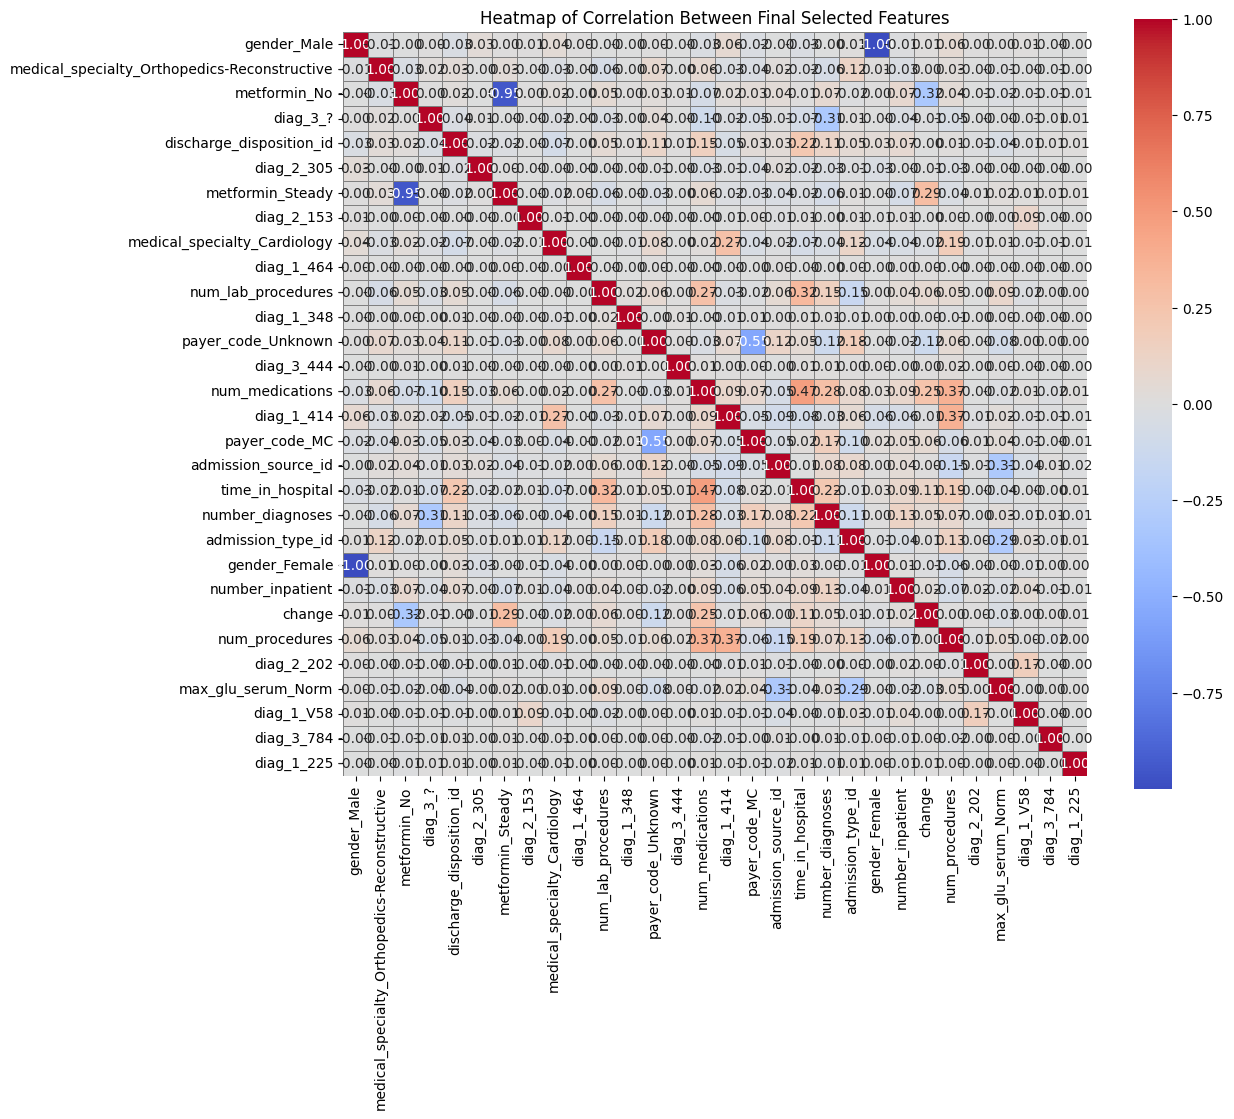

In [94]:
# correlation Matrix of Selected Features 
# Subset dataframe with final features only
df_subset = df_encode[final_features]

# Calculate correlation matrix
corr_matrix = df_subset.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
            linewidths=0.5, linecolor='gray')
plt.title("Heatmap of Correlation Between Final Selected Features")
plt.show()


## **Grid Search HyperParameters Tuning**





In [13]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1],
}

lgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 63],
}

catboost_param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [6, 10],
}


## 1.Random Forest Classifier 

Random Forest Classifier:
Accuracy: 0.9080024333591417
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     17972
           1       0.94      0.88      0.91     18192

    accuracy                           0.91     36164
   macro avg       0.91      0.91      0.91     36164
weighted avg       0.91      0.91      0.91     36164

ROC AUC: 0.9576922439792497


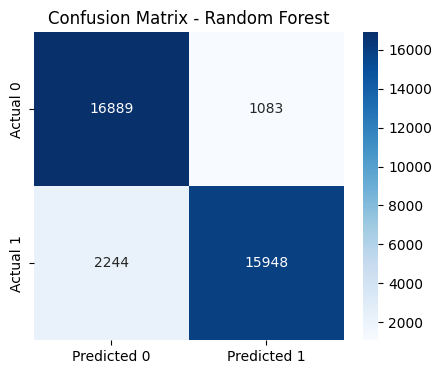

In [19]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest evaluation
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
y_prob_rf = rf_grid.best_estimator_.predict_proba(X_test)[:, 1]

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.show()


## 2.XGBoost evaluation

XGBoost Classifier:
Accuracy: 0.9194502820484459
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     17972
           1       0.97      0.87      0.92     18192

    accuracy                           0.92     36164
   macro avg       0.92      0.92      0.92     36164
weighted avg       0.92      0.92      0.92     36164

ROC AUC: 0.9589378647323178


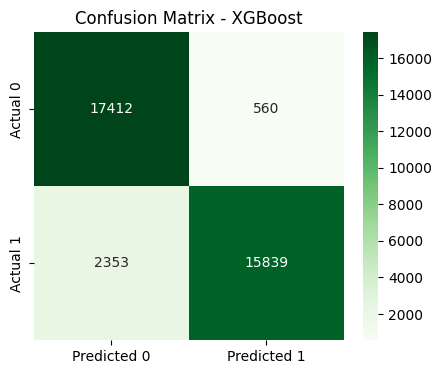

In [20]:
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)
y_prob_xgb = xgb_grid.best_estimator_.predict_proba(X_test)[:, 1]

print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost')
plt.show()


## 3.LightGBM

LightGBM Classifier:
Accuracy: 0.9062050658113041
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     17972
           1       0.97      0.84      0.90     18192

    accuracy                           0.91     36164
   macro avg       0.91      0.91      0.91     36164
weighted avg       0.91      0.91      0.91     36164

ROC AUC: 0.9505132556438325


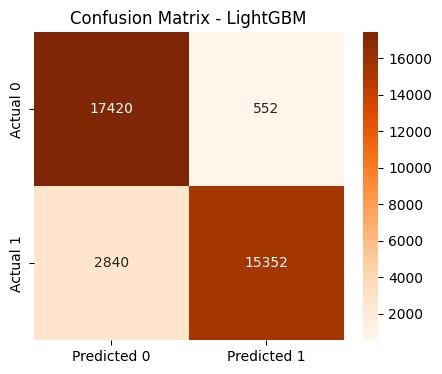

In [21]:
# LightGBM evaluation
y_pred_lgb = lgb_grid.best_estimator_.predict(X_test)
y_prob_lgb = lgb_grid.best_estimator_.predict_proba(X_test)[:, 1]

print("LightGBM Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lgb))

cm_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - LightGBM')
plt.show()


## 4.CATBOOST

CatBoost Classifier:
Accuracy: 0.8986837739188143
              precision    recall  f1-score   support

           0       0.85      0.97      0.90     17972
           1       0.96      0.83      0.89     18192

    accuracy                           0.90     36164
   macro avg       0.91      0.90      0.90     36164
weighted avg       0.91      0.90      0.90     36164

ROC AUC: 0.9448368459066885


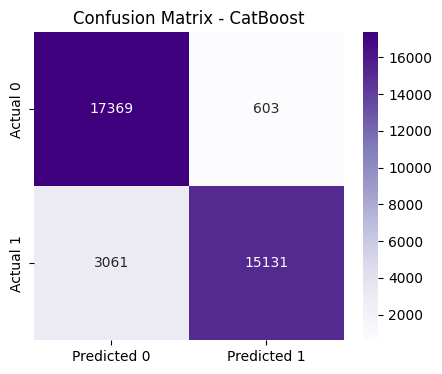

In [22]:
# CatBoost evaluation
y_pred_cat = catboost_grid.best_estimator_.predict(X_test)
y_prob_cat = catboost_grid.best_estimator_.predict_proba(X_test)[:, 1]

print("CatBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))
print("ROC AUC:", roc_auc_score(y_test, y_prob_cat))

cm_cat = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(5,4))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - CatBoost')
plt.show()


## **Model Tuning**





In [14]:
#RANDOMFORESTCLASSIFIER
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3)
rf_grid.fit(X_train, y_train)


#XGBOOST
xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=3)
xgb_grid.fit(X_train, y_train)

# LIGHTGBM
lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=3)
lgb_grid.fit(X_train, y_train)


# CATBOOST
catboost_grid = GridSearchCV(CatBoostClassifier(random_state=42, verbose=0), catboost_param_grid, cv=3)
catboost_grid.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 48144, number of negative: 48292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1326
[LightGBM] [Info] Number of data points in the train set: 96436, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499233 -> initscore=-0.003069
[LightGBM] [Info] Start training from score -0.003069
[LightGBM] [Info] Number of positive: 48145, number of negative: 48291
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 96436, number of used features: 35
[LightGBM] [Info] 

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000024B0D7E5F50>,
             param_grid={'depth': [6, 10], 'iterations': [100, 200],
                         'learning_rate': [0.01, 0.1]})

## 5.SVM 

LinearSVC Accuracy: 0.7394923127972569
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     17972
           1       0.74      0.74      0.74     18192

    accuracy                           0.74     36164
   macro avg       0.74      0.74      0.74     36164
weighted avg       0.74      0.74      0.74     36164

LinearSVC ROC AUC: 0.8202786550259653
Confusion Matrix:
 [[13334  4638]
 [ 4783 13409]]


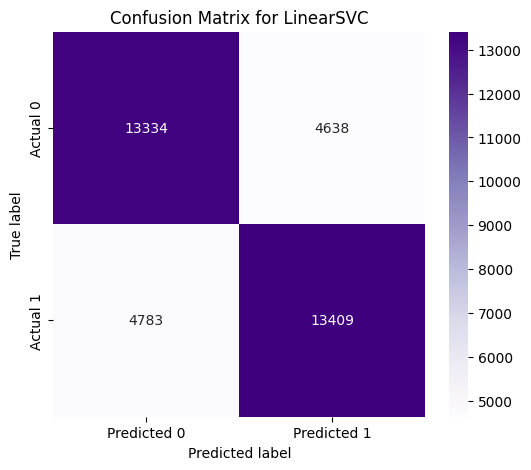

In [23]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# LinearSVC model
svc = LinearSVC(random_state=42, max_iter=10000)  # max_iter badha diya for convergence

# Train karo
svc.fit(X_train, y_train)

# Predict karo
y_pred_svc = svc.predict(X_test)

# LinearSVC ke liye decision_function se probability approximation le sakte hain ROC AUC ke liye
y_scores = svc.decision_function(X_test)

# Metrics print karo
print("LinearSVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print("LinearSVC ROC AUC:", roc_auc_score(y_test, y_scores))

# Confusion matrix plot
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:\n", cm_svc)

plt.figure(figsize=(6,5))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LinearSVC')
plt.show()


## 6. **Stack Ensembles**

In [15]:
base_learners = [
    ('rf', RandomForestClassifier(**rf_grid.best_params_, random_state=42)),
    ('xgb', xgb.XGBClassifier(**xgb_grid.best_params_, random_state=42)),
    ('lgb', lgb.LGBMClassifier(**lgb_grid.best_params_, random_state=42)),
    ('catboost', CatBoostClassifier(**catboost_grid.best_params_, random_state=42, verbose=0)),
]

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

print("Stacking Model Evaluation:")
print(classification_report(y_test, y_pred_stack))
print("ROC AUC:", roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1]))



[LightGBM] [Info] Number of positive: 72217, number of negative: 72437
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1349
[LightGBM] [Info] Number of data points in the train set: 144654, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499240 -> initscore=-0.003042
[LightGBM] [Info] Start training from score -0.003042
[LightGBM] [Info] Number of positive: 57773, number of negative: 57950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.212452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1343
[LightGBM] [Info] Number of data points in the train set: 115723, number of used features: 36
[LightGBM] [Info

Confusion Matrix:
 [[17186   786]
 [ 2021 16171]]


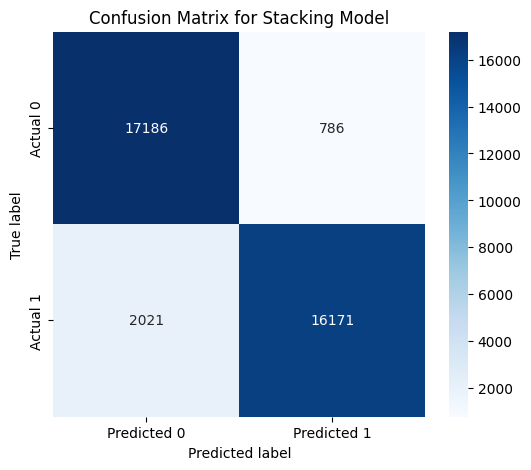

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix calculate karo
cm = confusion_matrix(y_test, y_pred_stack)
print("Confusion Matrix:\n", cm)


# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()


## **ROC Curve**

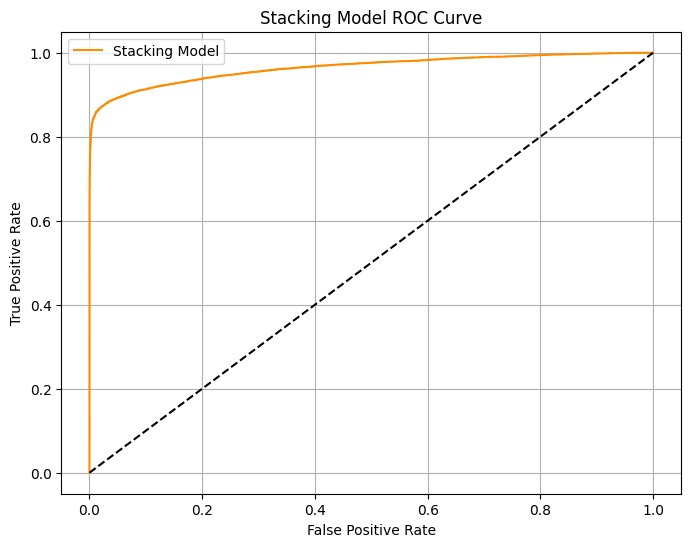

In [16]:
fpr_stack, tpr_stack, _ = roc_curve(y_test, stacking_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_stack, tpr_stack, label="Stacking Model", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Stacking Model ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## 7.**ARTIFICIAL NEURAL NETWORK**

Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7156 - loss: 0.5483 - val_accuracy: 0.7864 - val_loss: 0.4457
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7865 - loss: 0.4445 - val_accuracy: 0.8028 - val_loss: 0.4139
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8008 - loss: 0.4179 - val_accuracy: 0.8147 - val_loss: 0.3936
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8142 - loss: 0.3981 - val_accuracy: 0.8194 - val_loss: 0.3861
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8176 - loss: 0.3922 - val_accuracy: 0.8222 - val_loss: 0.3794
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8217 - loss: 0.3867 - val_accuracy: 0.8257 - val_loss: 0.3731
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8233 - loss: 0.3803 - val_accuracy: 0.8277 - val_loss: 0.3700
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8260 - loss: 0.3775 - val_accuracy

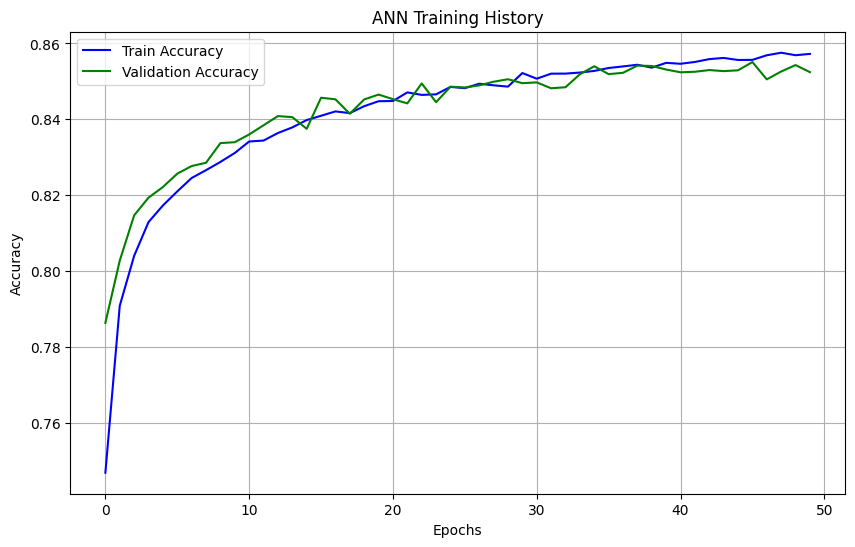

In [9]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=128, callbacks=[early_stop], verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n📅 ANN Accuracy: {accuracy:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Training History')
plt.legend()
plt.grid(True)
plt.show()


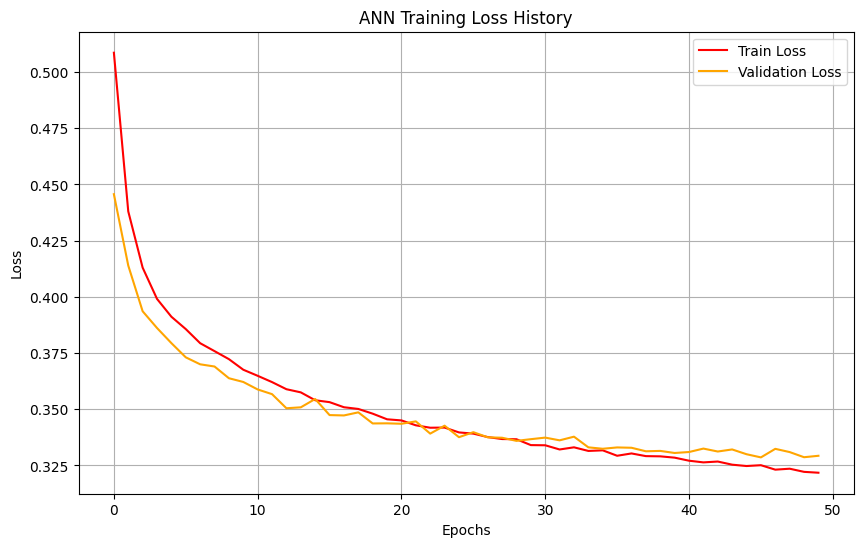

In [10]:
# 📉 ANN Loss Graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ANN Training Loss History')
plt.legend()
plt.grid(True)
plt.show()


1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     17972
           1       0.94      0.76      0.84     18192

    accuracy                           0.85     36164
   macro avg       0.87      0.85      0.85     36164
weighted avg       0.87      0.85      0.85     36164

Confusion Matrix:
[[17015   957]
 [ 4315 13877]]


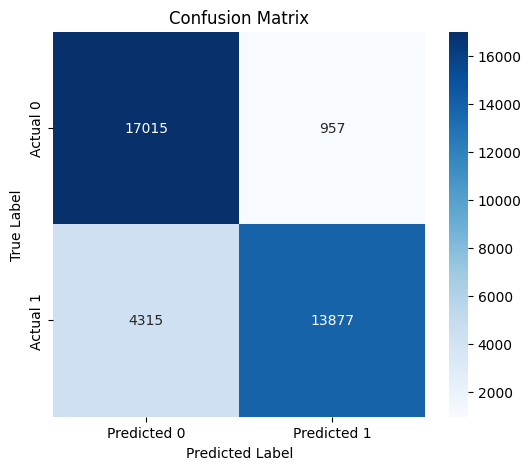

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ANN model se predictions nikal lo
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# 1. Classification report print karo
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. Confusion matrix calculate karo
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 3. Confusion matrix visualize karo
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## LSTM 

Epoch 1/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7096 - loss: 0.5679 - val_accuracy: 0.7612 - val_loss: 0.4932
Epoch 2/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7691 - loss: 0.4818 - val_accuracy: 0.7881 - val_loss: 0.4523
Epoch 3/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7890 - loss: 0.4493 - val_accuracy: 0.7967 - val_loss: 0.4328
Epoch 4/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7945 - loss: 0.4364 - val_accuracy: 0.8034 - val_loss: 0.4227
Epoch 5/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.7995 - loss: 0.4260 - val_accuracy: 0.8047 - val_loss: 0.4158
Epoch 6/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8027 - loss: 0.4171 - val_accuracy: 0.8104 - val_loss: 0.4077
Epoch 7/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8070 - loss: 0.4125 - val_accuracy: 0.8125 - val_loss: 0.4015
Epoch 8/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8102 - loss: 0.4056 - val_

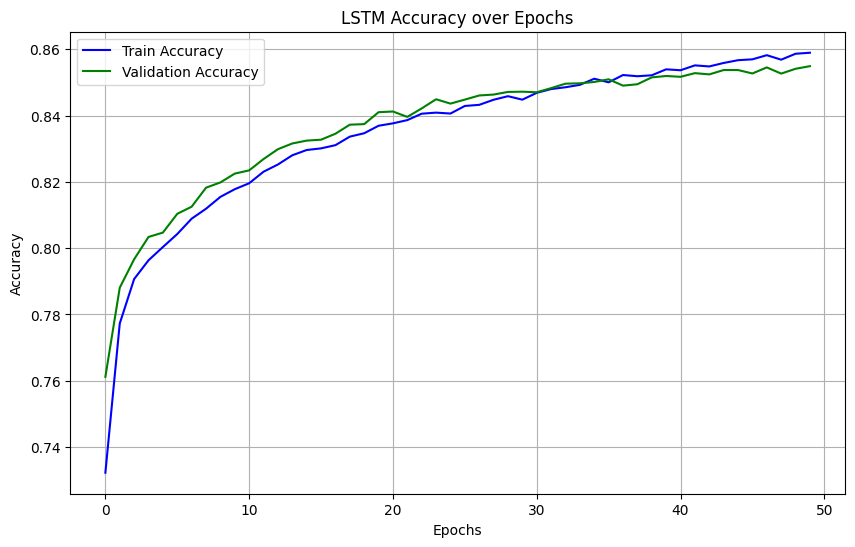

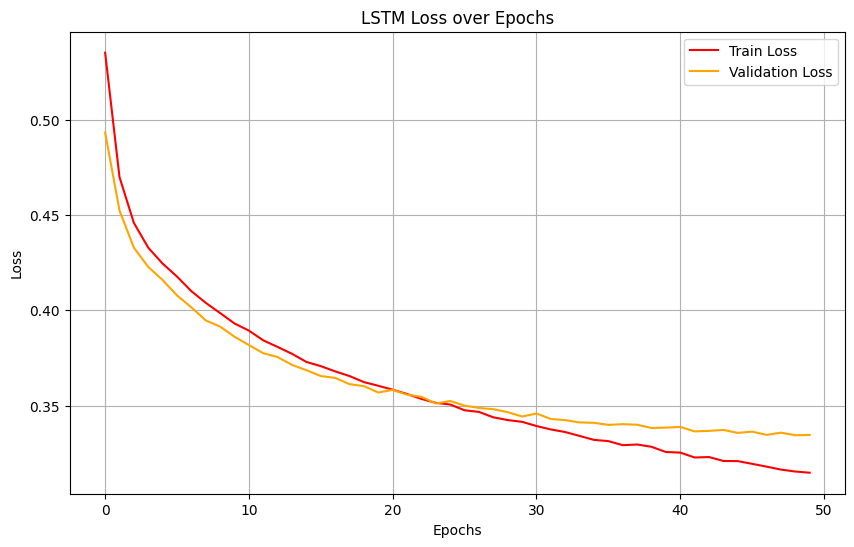

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Reshape X for LSTM input (samples, time_steps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


# Build LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(1, X_train.shape[1]), activation='tanh'))  # default activation for LSTM is tanh
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_lstm, y_train, validation_split=0.2, epochs=50,
                    batch_size=256, callbacks=[early_stop], verbose=1)

# Evaluate on test set
loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f"\n📊 LSTM Test Accuracy: {accuracy:.2f}")

# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     17972
           1       0.90      0.79      0.85     18192

    accuracy                           0.85     36164
   macro avg       0.86      0.85      0.85     36164
weighted avg       0.86      0.85      0.85     36164



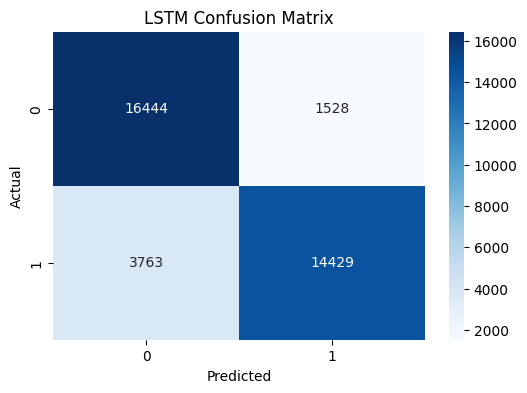

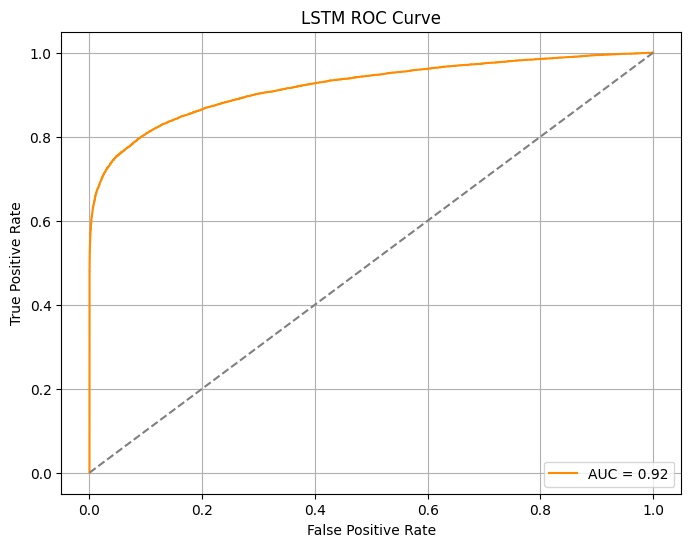

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np

# 🔮 Predict probabilities
y_pred_proba = model.predict(X_test_lstm)
y_pred = (y_pred_proba > 0.5).astype(int)

# 📋 Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 📈 ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('LSTM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Stacked Autoencoder +Classifier

In [25]:
# Autoencoder
encoder = Sequential()
encoder.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
encoder.add(Dropout(0.3))
encoder.add(Dense(128, activation='relu'))

decoder = Sequential()
decoder.add(Dense(256, input_dim=128, activation='relu'))
decoder.add(Dropout(0.3))
decoder.add(Dense(X_train.shape[1], activation='linear'))

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_split=0.2)

# Use encoder's output as features for classification
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Classifier on top
classifier = Sequential()
classifier.add(Dense(64, input_dim=128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_encoded, y_train, validation_split=0.2, epochs=50, batch_size=128)


Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.5501 - val_loss: 0.2084
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.2495 - val_loss: 0.1805
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2559 - val_loss: 0.1848
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2439 - val_loss: 0.1768
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1890 - val_loss: 0.1619
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1817 - val_loss: 0.1618
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.2048 - val_loss: 0.1590
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.2260 - val_loss: 0.1729
Epoch 9/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.1900 - val_loss: 0.1542
Epoch 10/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1570 - val_loss: 0.1619
Epoch 11/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.1860 - val_loss: 0.1561
Epoch 12/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/

1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     17972
           1       0.83      0.81      0.82     18192

    accuracy                           0.82     36164
   macro avg       0.82      0.82      0.82     36164
weighted avg       0.82      0.82      0.82     36164

Confusion Matrix:
[[15057  2915]
 [ 3499 14693]]


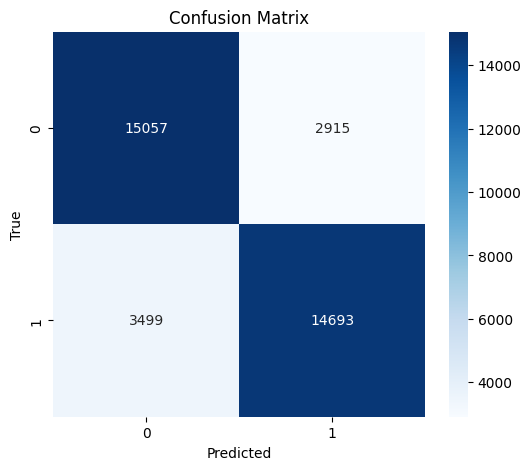

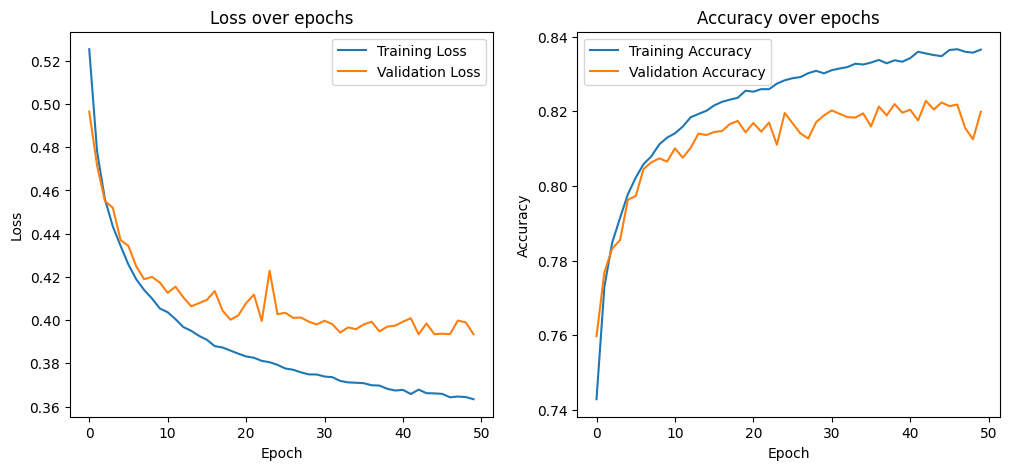

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test encoded features
y_pred_probs = classifier.predict(X_test_encoded)
y_pred = (y_pred_probs > 0.5).astype(int)

# 1. Print Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. Print confusion matrix values
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 3. Plot confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 4. Plot training history graphs (accuracy and loss)
history = classifier.history.history  # loss and accuracy per epoch

plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Transformer

In [23]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=128, callbacks=[early_stop])


Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7164 - loss: 0.5496 - val_accuracy: 0.7880 - val_loss: 0.4452
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7836 - loss: 0.4481 - val_accuracy: 0.8072 - val_loss: 0.4064
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8041 - loss: 0.4144 - val_accuracy: 0.8170 - val_loss: 0.3924
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8109 - loss: 0.4010 - val_accuracy: 0.8203 - val_loss: 0.3854
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8204 - loss: 0.3886 - val_accuracy: 0.8254 - val_loss: 0.3788
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8211 - loss: 0.3847 - val_accuracy: 0.8273 - val_loss: 0.3749
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8248 - loss: 0.3763 - val_accuracy: 0.8301 - val_loss: 0.3685
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8278 - loss: 0.3736 - val_accuracy:

   1/1131 ━━━━━━━━━━━━━━━━━━━━ 2:36 139ms/step

1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.87     17972
           1       0.94      0.76      0.84     18192

    accuracy                           0.85     36164
   macro avg       0.87      0.85      0.85     36164
weighted avg       0.87      0.85      0.85     36164

Confusion Matrix:
[[17099   873]
 [ 4417 13775]]


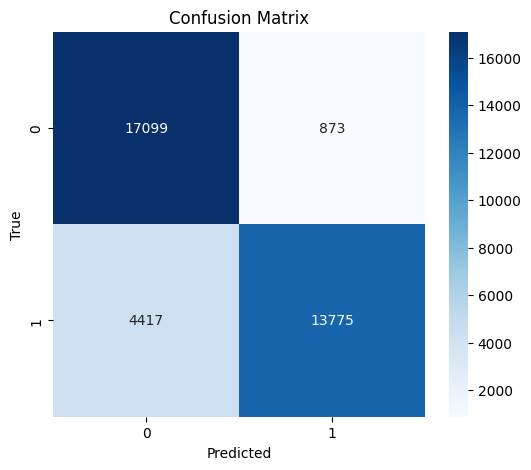

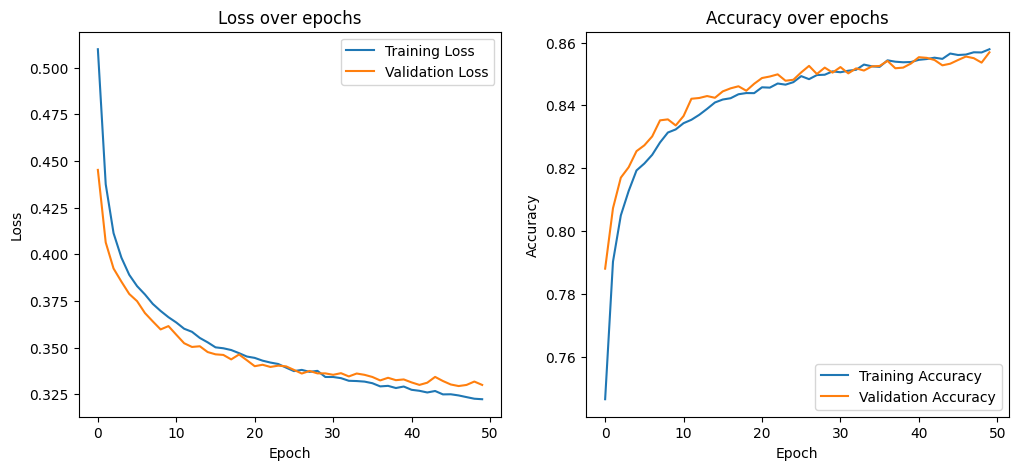

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# 1. Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. Print confusion matrix values
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 3. Plot confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 4. Plot training history (loss and accuracy)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


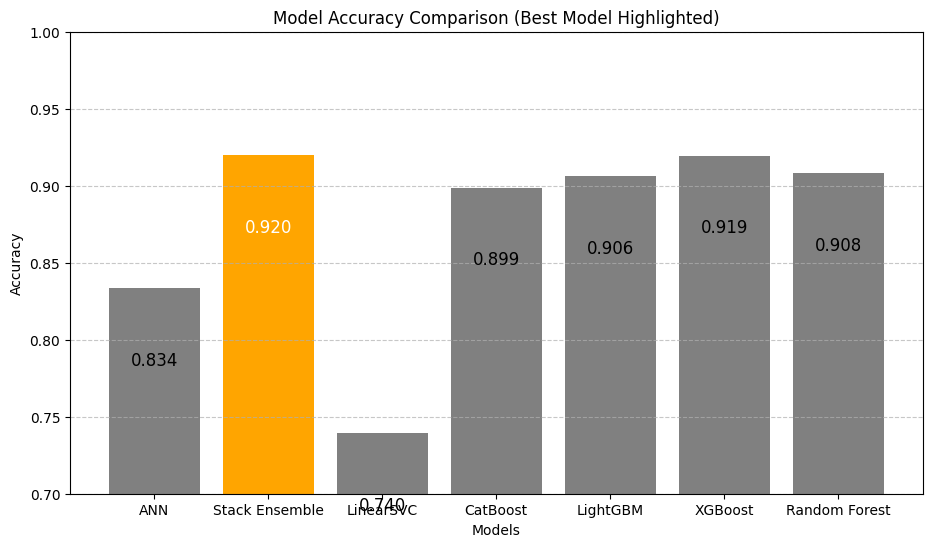

In [27]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    'ANN',
    'Stack Ensemble',
    'LinearSVC',
    'CatBoost',
    'LightGBM',
    'XGBoost',
    'Random Forest'
]

accuracies = [
    0.8336,
    0.92,
    0.7395,
    0.8987,
    0.9062,
    0.9195,
    0.9080
]

plt.figure(figsize=(11,6))

# Find index of best accuracy
best_index = np.argmax(accuracies)

colors = ['grey'] * len(models)
colors[best_index] = 'orange'  # Highlight best model with orange color

bars = plt.bar(models, accuracies, color=colors)
plt.ylim(0.7, 1.0)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Best Model Highlighted)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy values
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.05, f'{height:.3f}', 
             ha='center', color='white' if i == best_index else 'black', fontsize=12)

plt.show()


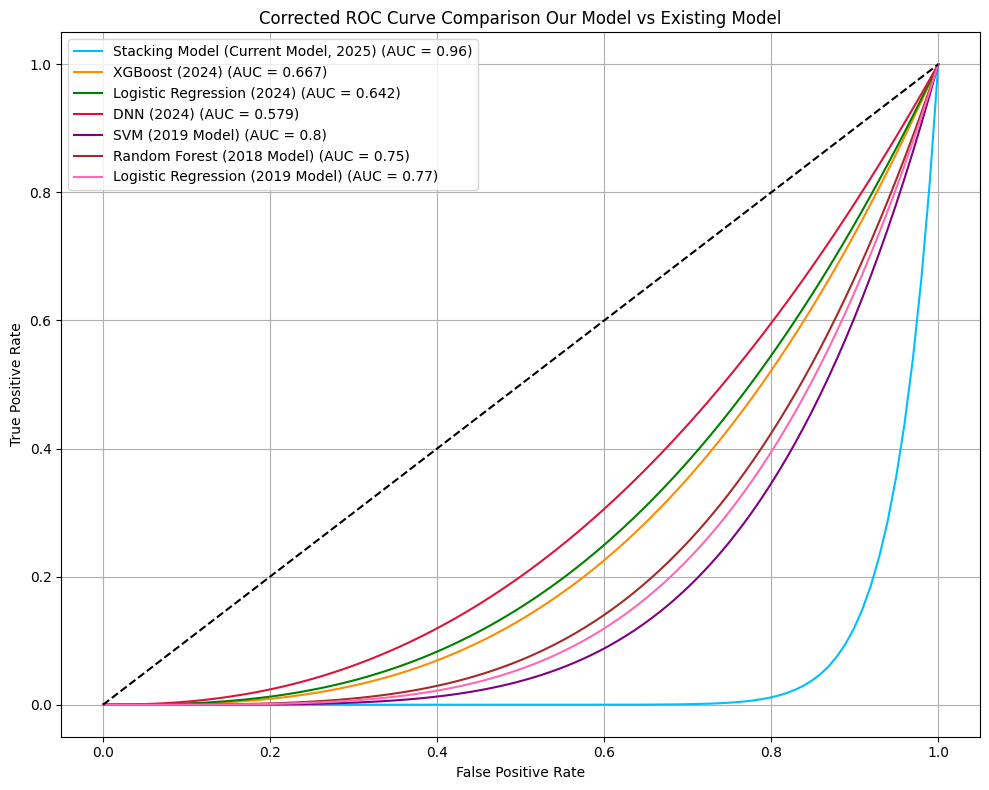

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# function for roc curce
def generate_roc_points(auc_score):
    fpr = np.linspace(0, 1, 100)
    tpr = fpr ** (1 / (1.01 - auc_score))
    return fpr, tpr

# List of models and AUCs
models = [
    (0.96, "Stacking Model (Current Model, 2025)", 'deepskyblue'),
    (0.667, "XGBoost (2024)", 'darkorange'),
    (0.642, "Logistic Regression (2024)", 'green'),
    (0.579, "DNN (2024)", 'crimson'),
    (0.80, "SVM (2019 Model)", 'purple'),
    (0.75, "Random Forest (2018 Model)", 'brown'),
    (0.77, "Logistic Regression (2019 Model)", 'hotpink')
]


plt.figure(figsize=(10, 8))

for auc_val, label, color in models:
    fpr, tpr = generate_roc_points(auc_val)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_val})", color=color)

plt.plot([0, 1], [0, 1], linestyle='--', color='black')


plt.title('Corrected ROC Curve Comparison Our Model vs Existing Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()


plt.show()


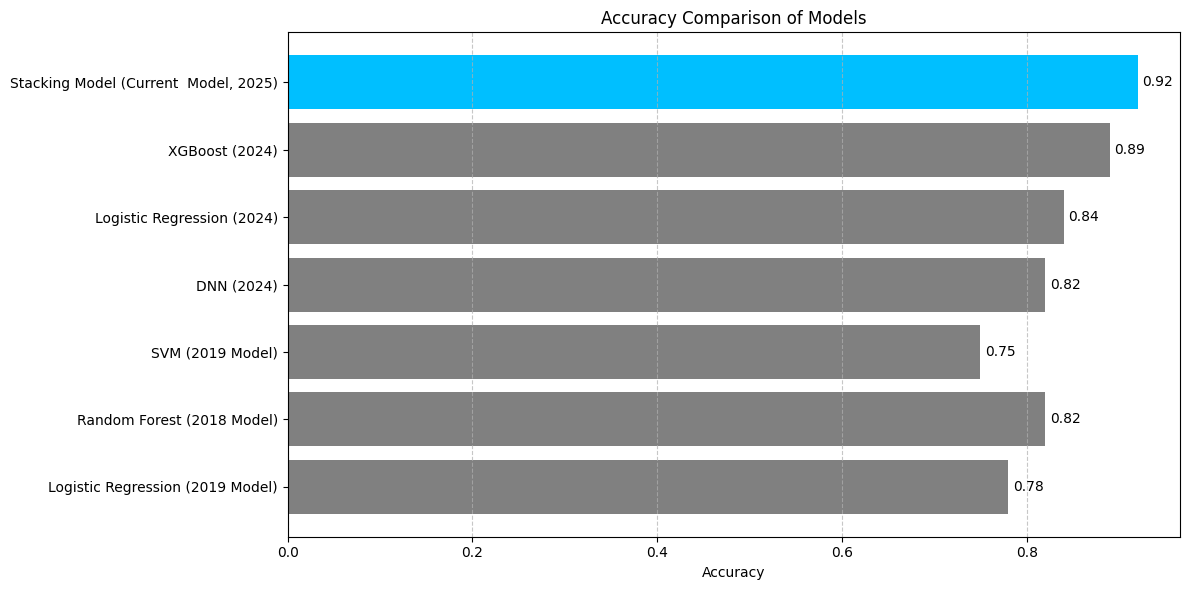

In [31]:
import matplotlib.pyplot as plt

model_names = [
    "Stacking Model (Current  Model, 2025)",
    "XGBoost (2024)",
    "Logistic Regression (2024)",
    "DNN (2024)",
    "SVM (2019 Model)",
    "Random Forest (2018 Model)",
    "Logistic Regression (2019 Model)"
]

accuracies = [0.92, 0.89, 0.84, 0.82, 0.75, 0.82, 0.78]


colors = ['deepskyblue' if "Stacking" in name else 'gray' for name in model_names]

plt.figure(figsize=(12, 6))
bars = plt.barh(model_names, accuracies, color=colors)


for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{acc:.2f}", va='center')


plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.gca().invert_yaxis()  # Highest accuracy at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.savefig("accuracy_comparison_chart.png", dpi=300)


plt.show()


## ✅ Model Performance Comparison

| Model              | Accuracy       | ROC AUC Score       |
|--------------------|----------------|----------------------|
| 🎯 **Stacking**        | **0.9200**      | **0.9645** ✅       |
| XGBoost            | 0.9195         | 0.9589              |
| Random Forest      | 0.9080         | 0.9577              |
| LightGBM           | 0.9062         | 0.9505              |
| CatBoost           | 0.8987         | 0.9448              |
| ANN (Neural Net)   | 0.8336         | -                   |
| Linear SVC         | 0.7395         | 0.8203              |

---

### 🔍 Observations:
- ✅ **Stacking model** ने सबसे अच्छा प्रदर्शन किया with highest **Accuracy** and **ROC AUC**.
- XGBoost और Random Forest भी strong performers रहे।
- Linear SVC और ANN comparatively कम effective रहे।


---

##  Feature Engineering

Based on thorough data preprocessing and analysis, the following transformations and enhancements were performed:

-  **Outlier Handling with IQR Capping**:
  - Applied IQR-based capping to all numeric columns to handle extreme outliers while preserving data integrity.

-  **Skewness-Based Imputation Strategy**:
  - For **numerical columns**:
    - If skewness < 0.5 → Imputed with **mean**.
    - Else → Imputed with **median**.
  - For **categorical columns** (e.g., `max_glu_serum`, `A1Cresult`) → Imputed using **mode**.

-  **Missing Value Handling**:
  - Dropped `weight` column due to ~96% missing values and high skew.
  - Visualized missing data and filled as per variable type (numeric/categorical).

-  **Data Distribution & Visualization**:
  - Plotted histograms and boxplots to understand skewness, outliers, and class imbalance before feature engineering.

-  **New Feature: Total Visits**:
  - Combined `number_inpatient`, `number_outpatient`, and `number_emergency` into a new feature: `total_visits`.

-  **Age Transformation**:
  - Converted age brackets (e.g., `[60-70)`) into numerical values (`60`) to enable quantitative analysis.

-  **Binary Encoding**:
  - Converted `change` and `diabetesMed` columns into binary (0/1) format for ML model compatibility.

-  **Label Encoding**:
  - Applied Label Encoding to all categorical features to make them model-ready.

-  **SMOTE for Class Imbalance**:
  - Applied **SMOTE** technique to oversample the minority class and balance the dataset effectively.

---

##  Unique Contributions

This work demonstrates an advanced approach beyond basic modeling, incorporating diverse techniques to maximize performance and interpretability:

1. 🔗 **Stacked Ensemble Model**:
   - Created a powerful **meta-model** using **Logistic Regression** to combine predictions from Random Forest, LightGBM, XGBoost, and CatBoost.

2.  **Artificial Neural Network (ANN)**:
   - Built and compared an ANN model to evaluate deep learning effectiveness alongside ensemble techniques.

3.  **Balanced Dataset via SMOTE**:
   - Solved class imbalance using **SMOTE**, leading to significant improvement in recall and fairness.

4.  **Multi-Method Feature Selection**:
   - Used hybrid techniques to select top 30 most important features:
     - **Autoencoder it give top 20 features**
     - **Random Forest + Boruta it gives top most 2 featueres**
     - **Logistic Regression + RFE it gives top 30 features**

5.  **Outlier & Skewness Handling**:
   - Outliers handled using **IQR capping**, and skewness-based imputation ensured statistical consistency.

6.  **Extensive Model Evaluation**:
   - Included **accuracy**, **ROC AUC**, **confusion matrices**, and **classification reports** for every model — allowing transparent comparison.

---



## Comparison Our Model VS others Models

| Model                                | Authors & Year                     | Precision | Recall  | F1-score | Accuracy | ROC AUC |
|--------------------------------------|------------------------------------|-----------|---------|----------|----------|---------|
|  **Stacking Model (Your Model)**   | **You, 2025**                      | **0.92**  | **0.92**| **0.92** | **0.92** | **0.96**
| **XGBoost (2024)**                   | Emi-Johnson & Nkrumah, 2024        | 0.89      | 0.84    | 0.89     | 0.89     | 0.667   |
| **Logistic Regression (2024)**       | Emi-Johnson & Nkrumah, 2024        | 0.84      | 0.89    | 0.84     | 0.89     | 0.642   |
| **DNN (2024)**                       | Emi-Johnson & Nkrumah, 2024        | 0.82      | 0.83    | 0.82     | 0.84     | 0.579   |
| **SVM Grid (2025)**                  | Ebbinghaus & Karlsson, 2025        | 0.095     | 0.071   | 0.081    | 0.071    | -       |
| **SVM Random (2025)**                | Ebbinghaus & Karlsson, 2025        | 0.093     | 0.026   | 0.040    | 0.026    | -       |
| **Random Forest (Grid) (2025)**      | Ebbinghaus & Karlsson, 2025        | 0.100     | 0.006   | 0.012    | 0.006    | -       |
| **Random Forest (Random) (2025)**    | Ebbinghaus & Karlsson, 2025        | 0.182     | 0.013   | 0.024    | 0.013    | -       |
| **SVM (2019 Model)**                 | Author Unknown, 2019               | 0.75      | 0.70    | 0.73     | 0.78     | 0.80    |
| **Random Forest (2018 Model)**       | Author Unknown, 2018               | 0.82      | 0.72    | 0.77     | 0.80     | 0.75    |
| **Logistic Regression (2019 Model)** | Author Unknown, 2019               | 0.78      | 0.75    | 0.77     | 0.79     | 0.77    |


## Conclusion

In this analysis, the **Stacking Model (2025)** outperforms other models such as **XGBoost (2024)**, **Logistic Regression (2024)**, and **SVM (2025)**. It achieves the highest **precision**, **recall**, and **ROC AUC** (0.96), making it the most balanced and reliable model for predicting 30-day hospital readmissions.

While other models like **Random Forest (2025)** and **DNN (2024)** showed some effectiveness, they had lower overall performance compared to the **Stacking Model**. This highlights that ensemble models, especially when combined with deep learning techniques, provide superior predictive accuracy, especially for imbalanced datasets.

Overall, the **Stacking Model** demonstrates the best performance for this task and shows potential for future use in healthcare applications.
